In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 
# sns.set()
# import scipy.stats as stats

In [2]:
df_customer = pd.read_csv('customer.csv')
df_click = pd.read_csv('click_stream.csv')
df_product = pd.read_csv('product.csv', on_bad_lines='skip')
df_trans = pd.read_csv('transactions.csv')

In [3]:
## Use this instead, if you're using colab

# url1='https://drive.google.com/file/d/17B6EQ9TJosC3b_u7ykg5ZpxPIFs2k3EO/view?usp=sharing'
# url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
# df_click = pd.read_csv(url1)

# url2='https://drive.google.com/file/d/1jyytgw3oU2IJPf0AVA6JbW0DZ2dKv2Ge/view?usp=sharing'
# url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]
# df_customer = pd.read_csv(url2)

# url3='https://drive.google.com/file/d/1rnTQrQl7IMCGJETDxMhYrAtj1gL3h_Ih/view?usp=sharing'
# url3='https://drive.google.com/uc?id=' + url3.split('/')[-2]
# df_product = pd.read_csv(url3, on_bad_lines='skip')

# url4='https://drive.google.com/file/d/1McJFpLLgyeQ--DcH-N8yF656ltSeoMiz/view?usp=sharing'
# url4='https://drive.google.com/uc?id=' + url4.split('/')[-2]
# df_trans = pd.read_csv(url4)



# Inspeksi dan Cleaning Data

## Dataset Customer

In [4]:
# inspeksi dan cleaning data
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [5]:
df_customer.shape

(100000, 15)

In [6]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [7]:
df_customer.sample(10)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
9243,69586,Bahuwarna,Salahudin,0818d89e-3d02-4ee9-a303-572c4341badc,0818d89e_3d02_4ee9_a303_572c4341badc@startupca...,M,1997-09-04,iOS,fb0d180e-139b-480c-aa0c-cf68f0bff4bf,iPhone; CPU iPhone OS 10_3_4 like Mac OS X,-7.801152,113.972178,Jawa Timur,Indonesia,2017-11-12
6298,49721,Cawisadi,Samosir,857ce969-9538-4fe2-a3ec-1eb89e566958,857ce969_9538_4fe2_a3ec_1eb89e566958@startupca...,M,1989-10-11,Android,ae23cf44-6a0b-499e-b4f2-f2bb93f12430,Android 2.0.1,-4.539714,104.590946,Lampung,Indonesia,2019-12-07
36798,40191,Kartika,Wijayanti,880803c7-2a45-46e5-bec3-f17d2bed9512,880803c7_2a45_46e5_bec3_f17d2bed9512@zakyfound...,F,2007-03-26,Android,f1c94b18-c195-4ba5-bcbe-9d03d710a316,Android 3.2.4,-3.101425,129.067545,Maluku,Indonesia,2018-06-23
52940,6214,Kamidin,Mangunsong,350e44c6-814b-43cc-9c64-0c833ae17371,350e44c6_814b_43cc_9c64_0c833ae17371@startupca...,M,2005-07-30,iOS,a3fa8847-2c6f-4ec5-931d-05c9763afb7b,iPhone; CPU iPhone OS 10_3_4 like Mac OS X,-7.126472,112.253988,Jawa Timur,Indonesia,2021-12-18
93699,72723,Lintang,Usada,07a53f68-29f6-42f2-a042-8a755a2093d3,07a53f68_29f6_42f2_a042_8a755a2093d3@zakyfound...,F,1992-02-25,Android,7d674902-2813-41a0-a15d-7c775c8ebcb9,Android 2.3.3,-8.020137,110.586012,Yogyakarta,Indonesia,2019-07-13
62239,72368,Amalia,Nurdiyanti,a6b52a07-f61a-48e8-8f18-66bbf3f39ea2,a6b52a07_f61a_48e8_8f18_66bbf3f39ea2@startupca...,F,2007-01-18,Android,76fa6c26-cfff-4334-a370-67a05ae7d755,Android 2.3.4,-1.469233,110.935376,Kalimantan Barat,Indonesia,2021-10-17
79837,55166,Ciaobella,Yuliarti,0f87ce43-fc8a-4fbf-b6f2-c3b9fcef9c82,0f87ce43_fc8a_4fbf_b6f2_c3b9fcef9c82@zakyfound...,F,2003-06-20,iOS,b659c4b8-446d-4a0c-aef9-be91ea91fefd,iPhone; CPU iPhone OS 4_2_1 like Mac OS X,-6.356489,106.907996,Jakarta Raya,Indonesia,2020-12-10
31301,77771,Narji,Waskita,418a5d27-f18f-4496-8a43-072d0294d7f2,418a5d27_f18f_4496_8a43_072d0294d7f2@zakyfound...,M,1981-12-07,iOS,b0c642ea-d19b-46e1-a8ab-75b2869f2ab6,iPhone; CPU iPhone OS 9_3_6 like Mac OS X,-5.136108,105.855783,Lampung,Indonesia,2020-01-05
98964,91308,Ikin,Utama,1e866397-f76c-40df-9b8f-48229c0163d7,1e866397_f76c_40df_9b8f_48229c0163d7@startupca...,M,1992-04-30,Android,0354e84e-dc23-4ff9-9b32-31d0f15b2293,Android 2.3.5,3.920767,108.119631,Kepulauan Riau,Indonesia,2021-11-20
21821,19231,Upik,Sihombing,3d9bf749-6184-477d-a25f-8330c2d17445,3d9bf749_6184_477d_a25f_8330c2d17445@startupca...,M,1984-09-01,iOS,655d7857-25de-4df1-ac87-015faf30b876,iPad; CPU iPad OS 6_1_6 like Mac OS X,-5.446937,104.286074,Lampung,Indonesia,2018-10-06


In [8]:
df_customer.duplicated().sum()

0

In [9]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [10]:
#mengubah tipe data yang tidak sesuai
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [12]:
df_customer.describe()

,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [13]:
df_customer.describe(include="O")

,first_name,last_name,username,email,gender,device_type,device_id,device_version,home_location,home_country
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,707,173,100000,100000,2,2,100000,86,33,1
top,Rahmi,Susanti,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,Android,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,Android 2.2.2,Jakarta Raya,Indonesia
freq,560,1028,1,1,64230,76637,1,1296,18715,100000


In [14]:
print(df_customer.birthdate.min())
print(df_customer.birthdate.max())

1954-06-30 00:00:00
2016-07-27 00:00:00


In [15]:
df_customer.birthdate.sort_values(ascending=False).head(20)

18437   2016-07-27
95661   2016-02-19
93456   2016-01-29
17262   2016-01-15
35826   2015-10-13
37890   2015-07-19
29371   2015-06-28
70817   2015-06-14
62773   2015-04-07
16333   2015-03-14
16615   2015-03-09
2310    2015-02-11
1403    2015-01-29
90829   2014-12-22
47834   2014-12-20
97162   2014-10-09
32420   2014-10-06
51839   2014-09-02
69462   2014-08-25
74399   2014-07-13
Name: birthdate, dtype: datetime64[ns]

In [16]:
df_customer.birthdate.sort_values(ascending=True).head(20)

76383   1954-06-30
97940   1955-01-01
51075   1955-02-14
76788   1955-05-04
76539   1955-06-01
52243   1957-01-02
13873   1957-01-04
15502   1958-08-19
59294   1959-02-28
27158   1960-10-31
13360   1960-11-20
83810   1960-11-29
47851   1961-04-03
77032   1961-07-20
40452   1961-09-06
17233   1962-04-21
14661   1962-06-26
56343   1962-07-11
58820   1962-07-29
85063   1962-07-29
Name: birthdate, dtype: datetime64[ns]

In [17]:
print(df_customer.first_join_date.min())
print(df_customer.first_join_date.max())

2016-06-30 00:00:00
2022-07-31 00:00:00


In [18]:
df_customer.first_join_date.sort_values(ascending=False).head(20)

81493   2022-07-31
53302   2022-07-31
6797    2022-07-31
16385   2022-07-31
1110    2022-07-31
13622   2022-07-31
27279   2022-07-31
49564   2022-07-31
57854   2022-07-31
27322   2022-07-31
91303   2022-07-31
56114   2022-07-31
27330   2022-07-31
5198    2022-07-31
82320   2022-07-31
37041   2022-07-31
85429   2022-07-31
49471   2022-07-31
14594   2022-07-31
16552   2022-07-31
Name: first_join_date, dtype: datetime64[ns]

In [19]:
df_customer.first_join_date.sort_values(ascending=True).head(20)

77238   2016-06-30
42782   2016-06-30
76057   2016-06-30
73575   2016-06-30
88919   2016-06-30
78050   2016-06-30
86170   2016-07-01
44347   2016-07-01
5767    2016-07-01
36203   2016-07-01
5708    2016-07-01
73421   2016-07-01
62964   2016-07-01
33957   2016-07-01
9576    2016-07-01
35809   2016-07-01
93141   2016-07-02
55931   2016-07-02
74017   2016-07-02
52067   2016-07-02
Name: first_join_date, dtype: datetime64[ns]

In [20]:
print(df_customer.email.str.contains(pat="@").sum())
print(df_customer.email.str.contains(pat="@zakyfoundation").sum())
print(df_customer.email.str.contains(pat="@startupcampus").sum())

100000
35906
64094


In [21]:
print(df_customer.email.apply(len).min())
print(df_customer.email.apply(len).max())

53
55


In [22]:
#mengecek apakah ada outlier pada home_location
df_customer.home_location.unique()

array(['Sumatera Barat', 'Jakarta Raya', 'Nusa Tenggara Barat',
       'Kalimantan Timur', 'Kalimantan Selatan', 'Kepulauan Riau',
       'Bengkulu', 'Jawa Barat', 'Nusa Tenggara Timur', 'Yogyakarta',
       'Jawa Timur', 'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung',
       'Bangka Belitung', 'Maluku', 'Sulawesi Utara', 'Sulawesi Barat',
       'Jambi', 'Kalimantan Tengah', 'Sumatera Utara', 'Kalimantan Barat',
       'Papua Barat', 'Sulawesi Selatan', 'Maluku Utara', 'Banten',
       'Bali', 'Riau', 'Sumatera Selatan', 'Aceh', 'Papua',
       'Sulawesi Tengah', 'Gorontalo'], dtype=object)

In [23]:
#mengecek apakah ada outlier pada device_type
df_customer.device_version.unique()

array(['iPhone; CPU iPhone OS 14_2_1 like Mac OS X', 'Android 2.2.1',
       'iPad; CPU iPad OS 4_2_1 like Mac OS X',
       'iPad; CPU iPad OS 14_2 like Mac OS X',
       'iPhone; CPU iPhone OS 10_3_3 like Mac OS X', 'Android 4.0.4',
       'Android 8.1.0', 'Android 4.2',
       'iPad; CPU iPad OS 10_3_3 like Mac OS X', 'Android 4.0.1',
       'Android 2.2.2', 'Android 2.3', 'Android 7.1.1', 'Android 2.3.3',
       'iPhone; CPU iPhone OS 6_1_6 like Mac OS X', 'Android 4.1.2',
       'Android 3.2.6', 'Android 11', 'Android 3.2.4', 'Android 6.0.1',
       'Android 5.1', 'Android 2.0.1', 'Android 7.1', 'Android 8.0.0',
       'iPad; CPU iPad OS 6_1_6 like Mac OS X', 'Android 3.2',
       'Android 3.2.5', 'Android 5.0.1', 'Android 3.2.3',
       'iPhone; CPU iPhone OS 9_3_6 like Mac OS X', 'Android 2.3.1',
       'Android 2.0', 'iPad; CPU iPad OS 5_1_1 like Mac OS X',
       'Android 2.3.6', 'Android 5.0.2', 'Android 3.1', 'Android 7.1.2',
       'Android 2.3.5', 'Android 4.2.2',
       '

In [24]:
gender_codes = {'F': 0, 'M': 1}
df_customer['gender'] = df_customer.gender.map(gender_codes)
df_customer.gender = df_customer.gender.astype('category')

### Interesting Discovery

* Most columns have the data type object. It appears that every column **NOT contains** empty value since the Non-Null count for every column is equal with the total number of rows (100000) **nor** the data contains duplicated data.
* Dataset ini memiliki 20 kolom dan 100000 baris.
* Periode pengambilan data 2016-06-30 hingga 2022-07-31
* Customer tertua lahir pada tahun 1954 dan yang termuda lahir pada tahun 2016.
* Terdapat 4 customer yang lahir pada tahun 2016, 9 customer yang lahir pada tahun 2015.
* Sebanyak 64230 customer berjenis kelamin perempuan
* Hanya terdapat 2 tipe device, yaitu android dan IoS dengan variasi sebanyak 86 versi device. Dan sebanyak 76637 customer menggunakan Android
* Data yang tersedia dari Indonesia dengan sebaran sebanyak 33 provinsi.
* It seems that there is no outlier in this dataset, **Ready for some EDA?**

## Product Dataset

In [25]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [26]:
df_product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [27]:
df_product.duplicated().sum()

0

In [28]:
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [29]:
df_product.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [30]:
df_product.describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,44424,44424,44424,44424,44409,44403,44107,44417
unique,5,7,45,143,46,4,8,31121
top,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,22147,21397,15402,7067,9728,21472,34406,82


In [31]:
#mengubah nama kolom gender product, agar berbeda dengan gender customer
df_product.gender = df_product.rename(columns = {'gender' : 'gender_product'}, inplace = True)

### Data Cleaning
Dapat dilihat dari statistik deskriptif di atas bahwa dataset ini, terdapat tipe data yang tidak sesuai dan memelurkan data cleaning

In [32]:
#Mengubah tipe data kolom year
df_product["year"] = pd.to_numeric(df_product["year"], errors='coerce')

In [33]:
fixed_product = df_product.copy()

In [34]:
fixed_product[fixed_product.articleType == "Jeans"].describe(include="O")

,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,609,609,609,609,603,609,609,609
unique,5,1,1,1,11,4,1,299
top,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Locomotive Men Washed Blue Jeans
freq,332,609,609,609,446,359,609,27


In [35]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,605,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,103,613,601,7


In [36]:
fixed_product[fixed_product.articleType == "Face Moisturisers"].describe(include="O")

,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,61,61,61,61,60,61,48,61
unique,1,1,2,1,10,1,1,60
top,Women,Personal Care,Skin,Face Moisturisers,White,Spring,Casual,Lotus Herbals Cocomoist Moisturising Lotion
freq,61,61,54,61,27,61,48,2


In [37]:
fixed_product[fixed_product.baseColour.isna()]

,id,gender_product,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6206,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9516,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12763,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15526,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15708,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17268,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20209,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


#### Cleaning kolom baseColour

In [38]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Face Moisturisers)
fixed_product.at[15526, "baseColour"] = "White"

In [39]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Jeans)
fixed_product.at[6206, "baseColour"] = "Blue"
fixed_product.at[9516, "baseColour"] = "Blue"
fixed_product.at[12763, "baseColour"] = "Blue"
fixed_product.at[15708, "baseColour"] = "Blue"
fixed_product.at[20209, "baseColour"] = "Blue"
fixed_product.at[34553, "baseColour"] = "Blue"

In [40]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist)
fixed_product.at[14291, "baseColour"] = "Blue"
fixed_product.at[17268, "baseColour"] = "Blue"
fixed_product.at[17639, "baseColour"] = "Blue"
fixed_product.at[23484, "baseColour"] = "Blue"
fixed_product.at[37531, "baseColour"] = "Blue"
fixed_product.at[40675, "baseColour"] = "Blue"
fixed_product.at[43260, "baseColour"] = "Blue"
fixed_product.at[44224, "baseColour"] = "Blue"

In [41]:
fixed_product.isna().sum()

id                      0
gender_product          0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom season

In [42]:
fixed_product['season'] = fixed_product['season'].fillna(fixed_product['season'].mode()[0])

In [43]:
fixed_product.isna().sum()

id                      0
gender_product          0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                  0
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom year

In [44]:
fixed_product.loc[21270:21274, :]

,id,gender_product,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
21270,5411,Women,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,Tribord To 100 Basic Lady Ss11
21271,44736,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2012.0,Formal,U.S. Polo Assn. Men Black Formal Shoes
21272,53781,Men,Apparel,Topwear,Tshirts,Blue,Summer,NaN,Sports,Puma Men Blue Sless Round Neck T-shirt
21273,34441,Women,Apparel,Topwear,Tshirts,Yellow,Summer,2012.0,Casual,Myntra Women Peace Love Chocolate Yellow T-shirt
21274,6294,Men,Apparel,Topwear,Tshirts,Green,Summer,2011.0,Casual,UCB Men's Super Star Print Green T-shirt


In [45]:
#Mengubah missing value pada kolom year dengan mode
fixed_product['year'] = fixed_product['year'].fillna(fixed_product['year'].mode()[0])

#### Cleaning kolom productDisplayName

In [46]:
fixed_product[fixed_product.productDisplayName.isna()]

,id,gender_product,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
22089,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
37531,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
40675,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN


In [47]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,613,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,111,613,601,7


In [48]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Maroon")].describe(include="O")

,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,12,12,12,12,12,12,12,11
unique,1,1,1,1,1,2,1,8
top,Women,Accessories,Bags,Clutches,Maroon,Summer,Casual,Lino Perros Women Maroon Clutch
freq,12,12,12,12,12,9,12,3


In [49]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Brown")].describe(include="O")

,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,17,17,17,17,17,17,17,16
unique,1,1,1,1,1,3,1,13
top,Women,Accessories,Bags,Clutches,Brown,Summer,Casual,Rocia Women Brown Clutch
freq,17,17,17,17,17,14,17,3


In [50]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist) dan baseColour
fixed_product.at[3677, "productDisplayName"] = "Lino Perros Women Maroon Clutch"
fixed_product.at[22089, "productDisplayName"] = "Rocia Women Brown Clutch"

In [51]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,613,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,111,613,601,7


In [52]:
#Mengubah missing value pada kolom productDisplayName dengan mode
fixed_product['productDisplayName'] = fixed_product['productDisplayName'].fillna(fixed_product['productDisplayName'].mode()[0])

#### Cleaning kolom year

In [53]:
fixed_product.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [54]:
fixed_product.usage.describe(include="O")

count      44107
unique         8
top       Casual
freq       34406
Name: usage, dtype: object

In [55]:
fixed_product[fixed_product.usage.isna()]

,id,gender_product,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
87,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
92,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012.0,NaN,Just Natural Unisex Charcoal Rain Jacket
292,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017.0,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
479,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...
511,55006,Women,Personal Care,Lips,Lip Gloss,Copper,Spring,2017.0,NaN,Lakme Sheer Satin Lip Gloss 51
...,...,...,...,...,...,...,...,...,...,...
43633,56605,Women,Personal Care,Makeup,Kajal and Eyeliner,Black,Spring,2017.0,NaN,Streetwear Black Eye Liner 01
44079,57715,Women,Personal Care,Lips,Lip Gloss,Red,Spring,2017.0,NaN,Lotus Herbals Seduction Sappy Watermelon Lip G...
44224,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,GUESS by Marciano Men Eau De Toilette 50 ml
44227,55045,Women,Personal Care,Lips,Lipstick,Purple,Spring,2017.0,NaN,Lakme Enrich Satins Lipstick 461


In [56]:
#Mengubah missing value pada kolom usage dengan mode
fixed_product['usage'] = fixed_product['usage'].fillna(fixed_product['usage'].mode()[0])

In [57]:
fixed_product.isna().sum()

id                    0
gender_product        0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

## Transactions Dataset

In [58]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [59]:
df_trans.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount
count,852584.000000,852584.000000,852584.000000,852584.000000,852584.000000,8.525840e+05
mean,49839.202245,2042.077949,9189.675152,-5.111961,110.966216,5.499165e+05
std,28999.324142,3063.481424,9377.856335,3.081469,6.398510,8.153761e+05
min,3.000000,0.000000,0.000000,-10.995516,95.030728,1.089800e+04
25%,24563.000000,0.000000,0.000000,-7.377923,106.863926,2.037938e+05
50%,49619.000000,0.000000,10000.000000,-6.241318,110.168478,3.029890e+05
75%,74957.000000,3993.000000,10000.000000,-3.088419,113.194940,5.147022e+05
max,99999.000000,24519.000000,50000.000000,5.874791,141.006140,2.350449e+07


In [60]:
df_trans.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [61]:
# Ubah Tipe Data shipment_date_limit
df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])
#df_trans['shipment_date_limit'].dtypes

#convert waktu UTC +0 menjadi waktu local
df_trans['shipment_date_limit'] = df_trans['shipment_date_limit'].dt.tz_convert("Asia/Jakarta")

#extract waktu
df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'], format='%d/%m/%y %H:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S')

df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])

In [62]:
# Ubah tipe data created_id
df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])
#df_trans['created_at'].dtypes

#convert waktu UTC +0 menjadi waktu local
df_trans['created_at'] = df_trans['created_at'].dt.tz_convert("Asia/Jakarta")

#extract waktu
df_trans['created_at'] = pd.to_datetime(df_trans['created_at'], format='%d/%m/%y %H:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S')

df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])

In [63]:
df_trans.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29 22:22:01,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 12:07:24,-8.227893,111.969107,199832
1,2018-07-30 19:40:22,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03 08:29:03,3.013470,107.802514,155526
2,2018-09-15 18:51:17,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18 15:41:49,-2.579428,115.743885,550696
3,2018-11-01 18:23:48,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-06 00:42:27,-3.602334,120.363824,271012
4,2018-12-18 18:20:30,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-24 00:24:07,-3.602334,120.363824,198753


In [64]:
# Cek Tipe Data
df_trans.dtypes

created_at                datetime64[ns]
customer_id                        int64
booking_id                        object
session_id                        object
product_metadata                  object
payment_method                    object
payment_status                    object
promo_amount                       int64
promo_code                        object
shipment_fee                       int64
shipment_date_limit       datetime64[ns]
shipment_location_lat            float64
shipment_location_long           float64
total_amount                       int64
dtype: object

In [65]:
# Cek Data Duplikat
df_trans.duplicated().sum()

0

In [66]:
# Cek Data Unik
df_trans.nunique()

created_at                849579
customer_id                50705
booking_id                852584
session_id                852584
product_metadata          852566
payment_method                 5
payment_status                 2
promo_amount               15180
promo_code                     8
shipment_fee                   6
shipment_date_limit       849667
shipment_location_lat     440963
shipment_location_long    440963
total_amount              469757
dtype: int64

In [67]:
# Cek Missing Value
df_trans.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [68]:
# Handling Missing Value
df_trans['promo_code'].fillna('NOPROMO', inplace=True)

In [69]:
# Hapus spesial character pada kolom produtc_metadata
df_trans['product_metadata'].replace("[^\w\s]", ' ', regex=True, inplace=True)

In [70]:
print('total pembelian tertinggi: ',df_trans['total_amount'].max())
print('total pembelian terendah: ',df_trans['total_amount'].min())

total pembelian tertinggi:  23504487
total pembelian terendah:  10898


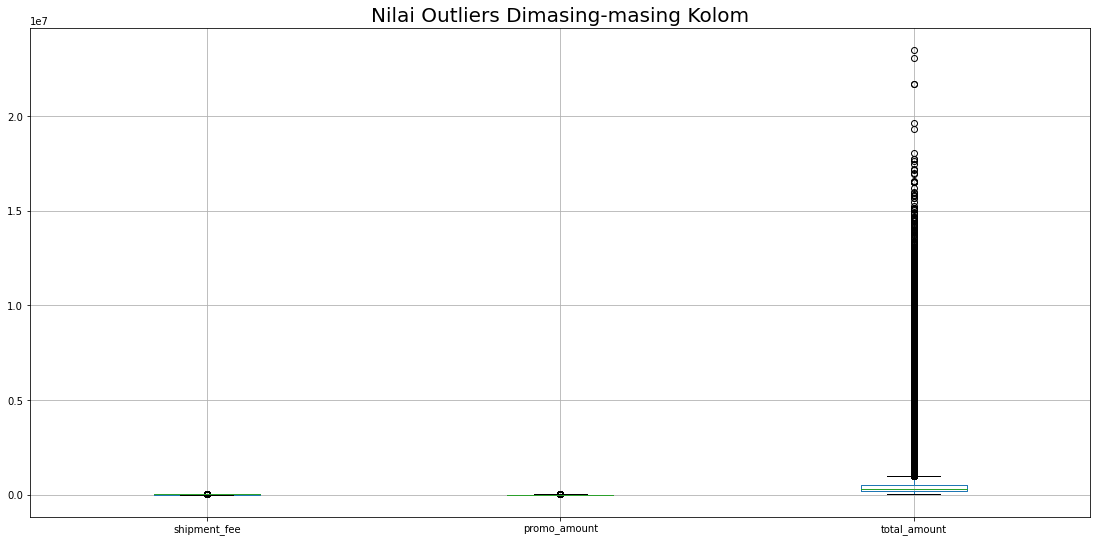

In [71]:
# Cek Data Outlier
cols = ['shipment_fee','promo_amount','total_amount']
plt.figure(figsize=(19,9))
df_trans[cols].boxplot()
plt.title('Nilai Outliers Dimasing-masing Kolom', fontsize=20)
plt.show()

In [72]:
# Cek Outliers Dengan Z Score
# Referensi : https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
  data_outlier[col] = detect_outliers_zscore(df_trans[col])
  print('Outliers Dengan Metode Z Score(', col, ')', len(data_outlier[col]), 'outlier :', data_outlier[col])
  print('=====================================================================================================')

Outliers Dengan Metode Z Score( shipment_fee ) 27672 outlier : [50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000

In [73]:
# # Handling Outliers (total_amount)
# mean_total_amount = np.mean(df_trans['total_amount'])
# mean_total_amount

# for i in data_outlier['total_amount']:
#     df_trans['total_amount'] = np.where(df_trans['total_amount'] == i, mean_total_amount, df_trans['total_amount'])
# detect_outliers_zscore(df_trans['total_amount'])

In [74]:
# Membuat Kolom id dengan product_id isi dari kolom product metadata
df_trans['id'] = df_trans.product_metadata.str[15:21]
df_trans['id'] = pd.to_numeric(df_trans['id'], errors='coerce')

In [75]:
# Membuat Kolom qty dengan quantity dari kolom product metadata
df_trans['qty'] = df_trans.product_metadata.str[34:36]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['qty'] = pd.to_numeric(df_trans['qty'], errors='coerce')
#df_trans['qty'].value_counts()

In [76]:
# Membuat Kolom price dengan item_price dari kolom product metadata
df_trans['price'] = df_trans.product_metadata.str[51:58]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['price'] = pd.to_numeric(df_trans['price'], errors='coerce')
#df_trans['price'].value_counts()

## Click Stream Dataset

In [77]:
df_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [78]:
df_click.shape

(12833602, 6)

In [79]:
df_click.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [80]:
df_click.sample(10)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
3158749,0fe99648-6948-4014-80cb-2e39ea97c188,HOMEPAGE,2020-12-26T10:05:08.074458Z,6211fb12-5125-4d4d-92c5-bc496aea026a,MOBILE,NaN
9893476,caf24604-1aef-4007-ab97-f77b2f42fc4e,CLICK,2021-03-26T21:49:37.838057Z,7d214e2a-bfd1-40ba-8366-8d7f85ae41e3,MOBILE,NaN
6620885,01e2b633-27ff-4407-8bdf-9241fab78019,ADD_TO_CART,2022-02-07T22:00:18.608719Z,4bd32fbd-2820-4a00-94c2-faa87d6d4a80,MOBILE,"{'product_id': 47175, 'quantity': 2, 'item_pri..."
6632573,a3c1f9fa-6a77-4319-98e6-b11243782a08,HOMEPAGE,2019-12-01T01:23:16.609954Z,e886c260-ae13-4c6c-81ba-7737dc88a251,MOBILE,NaN
5099462,b1c793ab-ecf0-4828-b6e4-e487d5b50c99,ADD_PROMO,2016-09-03T13:03:45.364644Z,f7e0bdd4-d549-485a-ad0a-fa4439144774,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 4233}"
3436997,f15074cf-eb33-4d7f-8e83-d5a87bdaea27,CLICK,2020-08-10T18:50:33.187895Z,cfcf6072-0136-426a-a857-9f835f9df159,MOBILE,NaN
9990601,eb3829b7-0a02-44e9-8b69-bda87840771d,HOMEPAGE,2021-05-06T13:34:35.967433Z,c51c2c97-5462-4f85-8e35-26ee741c1e4c,MOBILE,NaN
2738541,5e06b245-bb97-4847-9970-45ec9a68db39,SCROLL,2020-08-12T22:45:38.470106Z,3f36b09b-6c35-4097-a59f-a53f07af9bf6,MOBILE,NaN
10456882,a4c55091-8a7b-41ab-8439-de8113fd63d7,CLICK,2021-06-28T01:00:28.576014Z,061250b4-f9ee-45b1-9486-f9baa50db0af,MOBILE,NaN
2910760,14e39d1c-d39a-4367-8582-2f9ffb43b644,ADD_TO_CART,2022-02-28T03:27:36.168290Z,2714a982-eef8-4c46-af48-681988c20e6f,MOBILE,"{'product_id': 20949, 'quantity': 1, 'item_pri..."


In [81]:
df_click.isna().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [82]:
#referensi : https://www.linkedin.com/pulse/what-do-z-mean-timestamp-format-omar-ismail/
#mengubah tipe data yang tidak sesuai
df_click['event_time'] = pd.to_datetime(df_click['event_time'])

#convert waktu UTC +0 menjadi waktu local
df_click['event_time'] = df_click['event_time'].dt.tz_convert("Asia/Jakarta")

#extract waktu
df_click['event_time'] = pd.to_datetime(df_click['event_time'], format='%d/%m/%y %H:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S')

df_click['event_time'] = pd.to_datetime(df_click['event_time'])

In [83]:
df_click.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 22:54:32,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 23:03:57,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 19:05:10,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 19:06:33,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 19:15:29,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [84]:
#menampilkan jenis perangkat pengaksesan yang digunakan oleh customer
df_click.traffic_source.unique()

array(['MOBILE', 'WEB'], dtype=object)

### Merge Data

In [85]:
%%time
# Merge dataset
df_1 = pd.merge(df_click,df_trans,how='left',on='session_id' )
df_1 = pd.merge(df_1, fixed_product,how='left',on='id' )
df_1 = pd.merge(df_1, df_customer, how='left', on='customer_id')

CPU times: total: 4min 5s
Wall time: 10min 30s


In [86]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833602 entries, 0 to 12833601
Data columns (total 45 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   session_id              object        
 1   event_name              object        
 2   event_time              datetime64[ns]
 3   event_id                object        
 4   traffic_source          object        
 5   event_metadata          object        
 6   created_at              datetime64[ns]
 7   customer_id             float64       
 8   booking_id              object        
 9   product_metadata        object        
 10  payment_method          object        
 11  payment_status          object        
 12  promo_amount            float64       
 13  promo_code              object        
 14  shipment_fee            float64       
 15  shipment_date_limit     datetime64[ns]
 16  shipment_location_lat   float64       
 17  shipment_location_long  float64       
 18  

### Berapa jumlah customer yang daftar?

In [87]:
sign_in_cust = df_customer['customer_id'].isin(df_trans['customer_id'])
sign_in_cust.value_counts()

True     50705
False    49295
Name: customer_id, dtype: int64

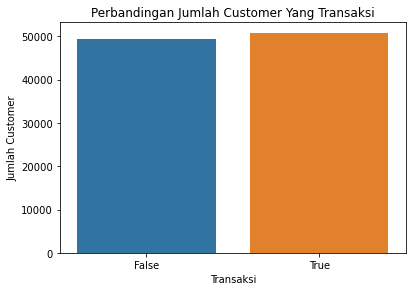

In [88]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.countplot(x= sign_in_cust.index, data=sign_in_cust)
plt.xlabel("Transaksi")
plt.ylabel("Jumlah Customer")
plt.title("Perbandingan Jumlah Customer Yang Transaksi")
plt.show()

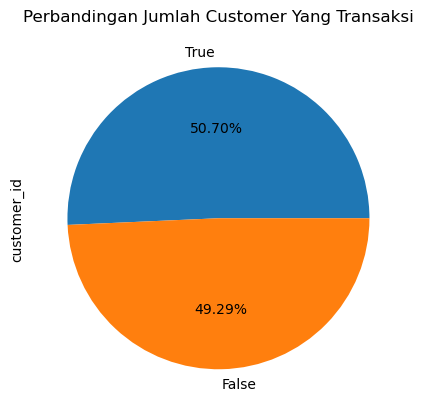

In [89]:
plt.figure(figsize=(5,5), dpi= 100)
sign_in_cust.value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Perbandingan Jumlah Customer Yang Transaksi")
plt.show()

### Apa saja device para customer?

In [90]:
dev_type = df_customer.groupby("device_type")[["customer_id"]].count()
dev_type

,customer_id
device_type,
Android,76637
iOS,23363


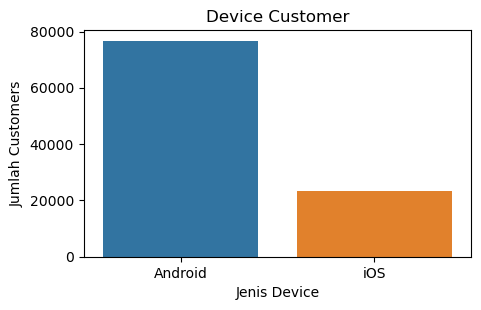

In [91]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(x=dev_type.index, y=dev_type.customer_id)
plt.xlabel("Jenis Device")
plt.ylabel("Jumlah Customers")
plt.title("Device Customer");

### Bagaimana distribusi customer berdasarkan gender?

In [92]:
gender_dist = df_customer.groupby("gender")[["customer_id"]].count()
gender_dist

,customer_id
gender,
0,64230
1,35770


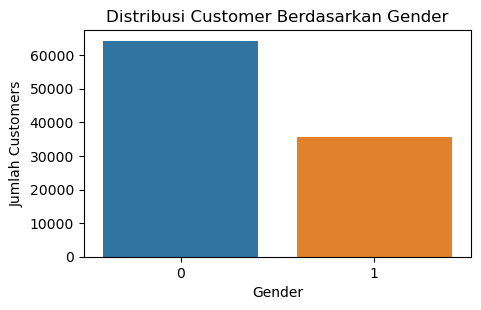

In [93]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(x=gender_dist.index, y=gender_dist.customer_id)
plt.xlabel("Gender")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Customer Berdasarkan Gender");

### Bagaimana distribusi customer berdasarkan tahun lahir?

In [94]:
birth_dist = df_customer.groupby(df_customer["birthdate"].dt.year)[["customer_id"]].count()
birth_dist.sort_values("customer_id", ascending=False)

,customer_id
birthdate,
1998,5653
1997,5547
1996,5455
1999,5436
1994,5355
...,...
1960,3
1957,2
1959,1


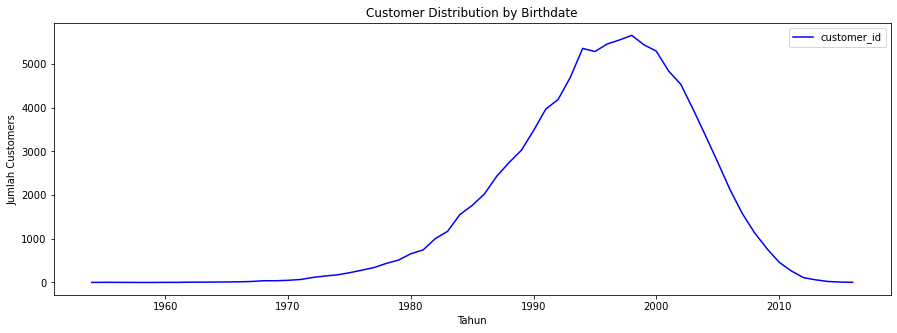

In [95]:
birth_dist.plot(kind="line", color = "blue", figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Customers")
plt.title("Customer Distribution by Birthdate")
plt.show()

### Bagaimana distribusi customer berdasarkan provinsi?

In [96]:
prov_dist = df_customer.groupby(df_customer["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)
prov_dist

,customer_id
home_location,
Jakarta Raya,18715
Jawa Barat,11486
Jawa Tengah,10960
Jawa Timur,9953
Yogyakarta,7849
Kalimantan Barat,5603
Lampung,5426
Kalimantan Selatan,4229
Kalimantan Tengah,4091


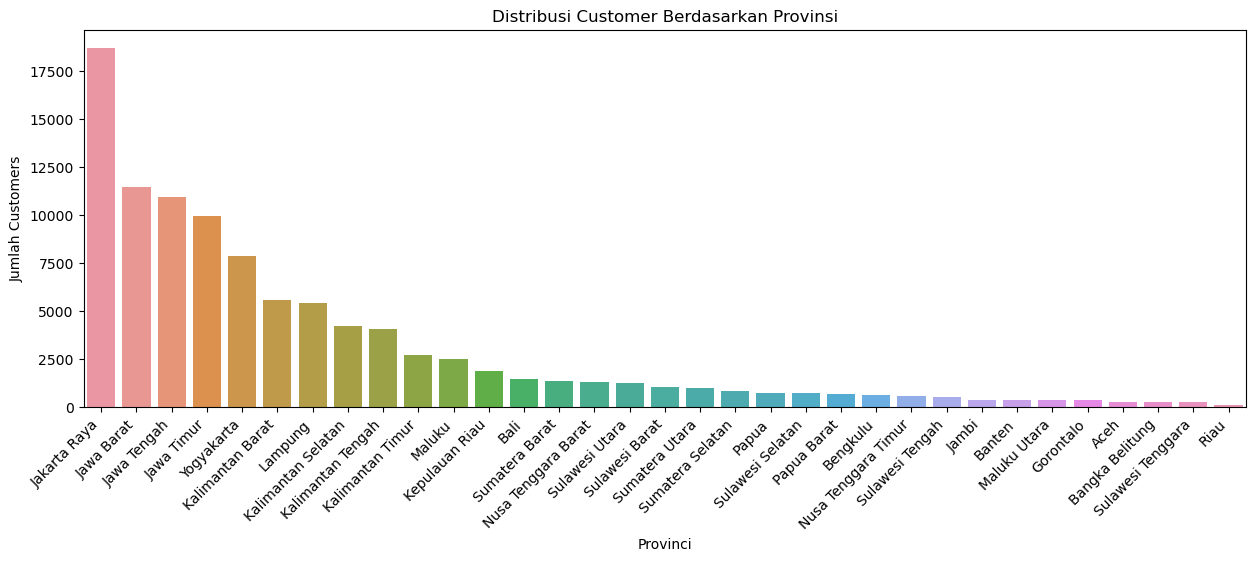

In [97]:
plt.figure(figsize=(15,5), dpi=100)
sns.barplot(x=prov_dist.index, y=prov_dist.customer_id)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Provinci")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Customer Berdasarkan Provinsi")
plt.show()

### Bagaimana distribusi customer sign in?

In [98]:
signin_dist = df_customer.groupby(df_customer["first_join_date"].dt.year)[["customer_id"]].count()
signin_dist.sort_values("customer_id", ascending=False)

,customer_id
first_join_date,
2021,22760
2020,17821
2019,15303
2022,14360
2018,13587
2017,11440
2016,4729


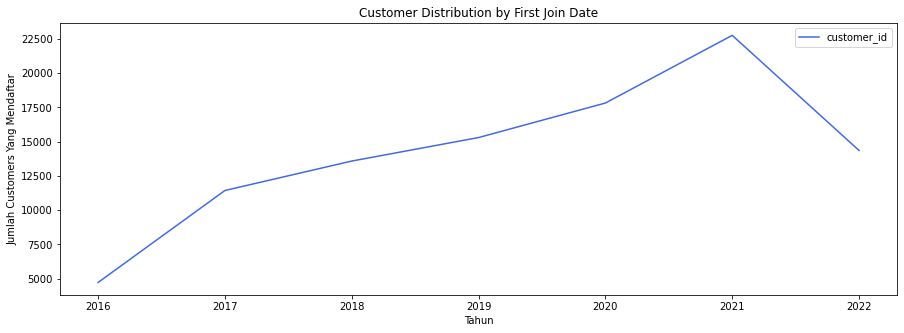

In [99]:
signin_dist.plot(kind="line", color = "royalblue", figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Customers Yang Mendaftar")
plt.title("Customer Distribution by First Join Date")
plt.show()

### Bagaimana jumlah customer yang mendaftar berdasarkan bulan?

In [100]:
daftar_bymonth = df_customer.groupby(df_customer["first_join_date"].dt.month)["customer_id"].count()
daftar_bymonth

first_join_date
1      8100
2      7429
3      7773
4      7457
5      7915
6      7504
7     14716
8      8293
9      7629
10     8009
11     7533
12     7642
Name: customer_id, dtype: int64

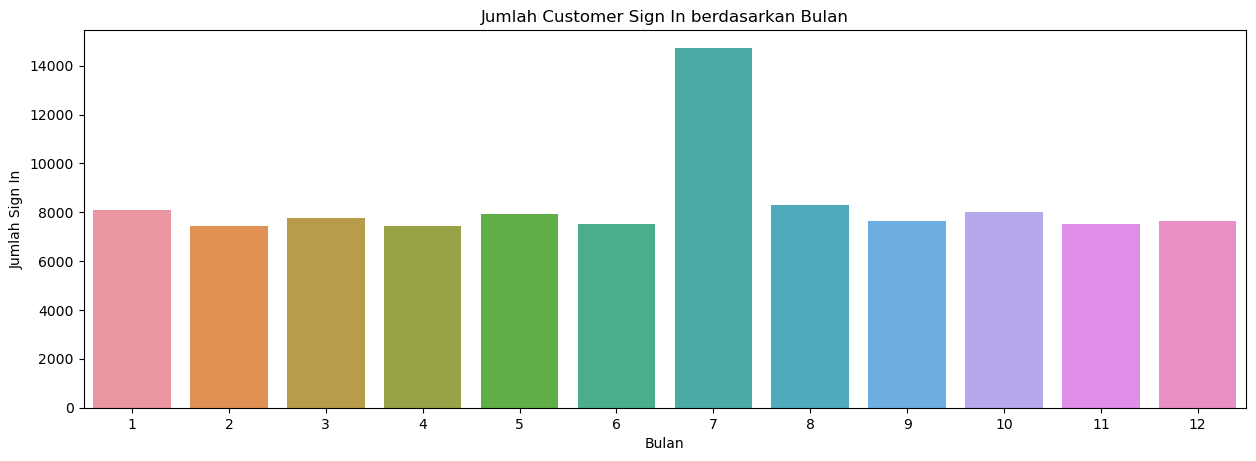

In [101]:
plt.figure(figsize=(15,5), dpi=100)
sns.barplot(x=daftar_bymonth.index, y=daftar_bymonth.values)
plt.xticks(rotation=0,ha='center')
plt.xlabel('Bulan')
plt.ylabel("Jumlah Sign In")
plt.title("Jumlah Customer Sign In berdasarkan Bulan")
plt.show()

### Bagaimana jumlah customer yang mendaftar berdasarkan tanggal?

In [102]:
daftar_byday = df_customer.groupby(df_customer["first_join_date"].dt.day)["customer_id"].count()
daftar_byday

first_join_date
1     3523
2     3818
3     3723
4     3646
5     3814
6     3402
7     3070
8     3029
9     3221
10    3204
11    3196
12    3169
13    2999
14    3051
15    3114
16    3077
17    3210
18    3142
19    3169
20    3012
21    3059
22    2955
23    3171
24    3261
25    3231
26    3149
27    3092
28    3140
29    3113
30    3622
31    2618
Name: customer_id, dtype: int64

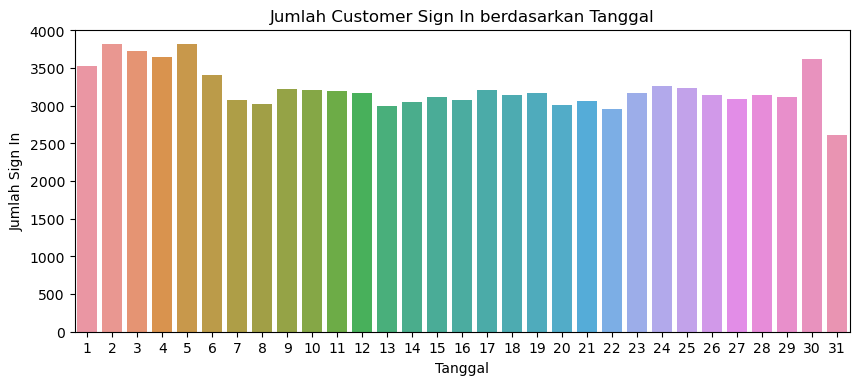

In [103]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=daftar_byday.index, y=daftar_byday.values)
plt.xticks(rotation=0,ha='center')
plt.xlabel('Tanggal')
plt.ylabel("Jumlah Sign In")
plt.title("Jumlah Customer Sign In berdasarkan Tanggal")
plt.show()

### Apa Product Gender Terfavorit?

In [104]:
fav_gen = df_product.groupby("gender_product")["id"].count()
fav_gen

gender_product
Boys        830
Girls       655
Men       22147
Unisex     2161
Women     18631
Name: id, dtype: int64

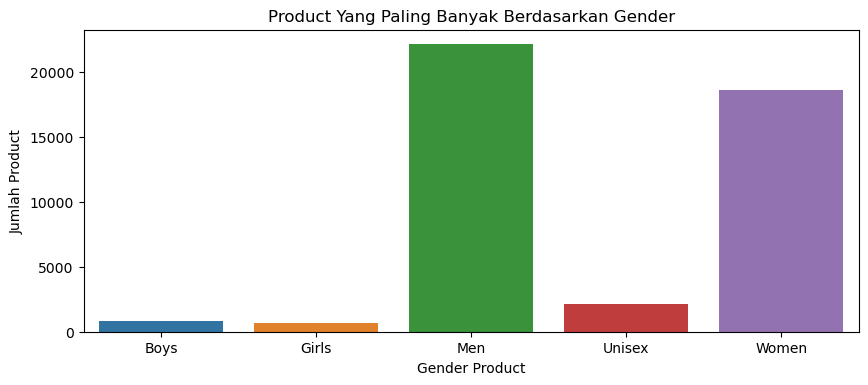

In [105]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=fav_gen.index, y=fav_gen.values)
plt.xticks(rotation=0,ha='center')
plt.xlabel('Gender Product')
plt.ylabel("Jumlah Product")
plt.title("Product Yang Paling Banyak Berdasarkan Gender")
plt.show()

### Apa Master Category Product Terfavorit?

In [106]:
master_cat = df_product.groupby("masterCategory")["id"].count()
master_cat

masterCategory
Accessories       11274
Apparel           21397
Footwear           9219
Free Items          105
Home                  1
Personal Care      2403
Sporting Goods       25
Name: id, dtype: int64

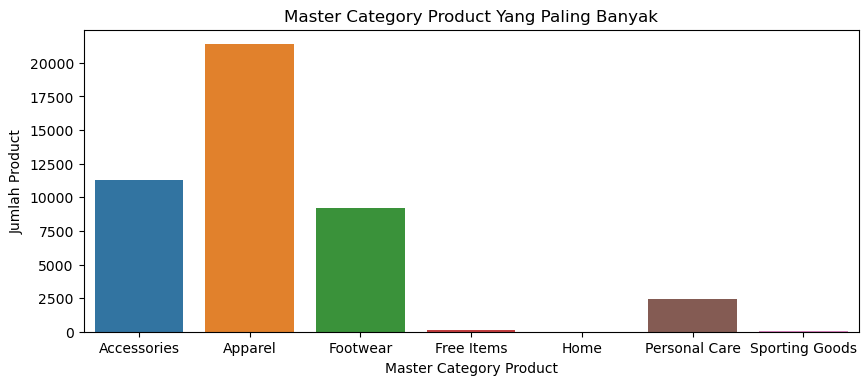

In [107]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=master_cat.index, y=master_cat.values)
plt.xticks(rotation=0,ha='center')
plt.xlabel('Master Category Product')
plt.ylabel("Jumlah Product")
plt.title("Master Category Product Yang Paling Banyak")
plt.show()

### Apa Sub Category Product Terfavorit?

In [108]:
sub_cat = df_product.groupby("subCategory")["id"].count()
sub_cat = sub_cat.sort_values(ascending=False).head(10)
sub_cat

subCategory
Topwear       15402
Shoes          7343
Bags           3055
Bottomwear     2694
Watches        2542
Innerwear      1808
Jewellery      1079
Eyewear        1073
Fragrance      1011
Sandal          963
Name: id, dtype: int64

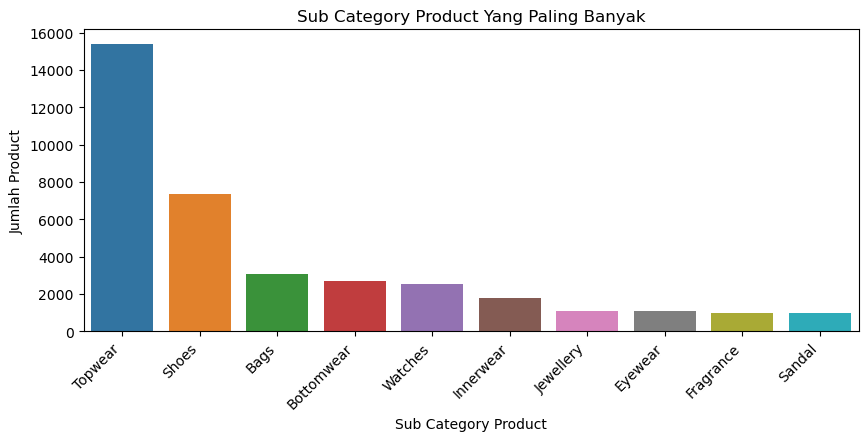

In [109]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=sub_cat.index, y=sub_cat.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sub Category Product')
plt.ylabel("Jumlah Product")
plt.title("Sub Category Product Yang Paling Banyak")
plt.show()

### Apa Article Type Product Terfavorit?

In [110]:
article_type = df_product.groupby("articleType")["id"].count()
article_type = article_type.sort_values(ascending=False).head(10)
article_type

articleType
Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: id, dtype: int64

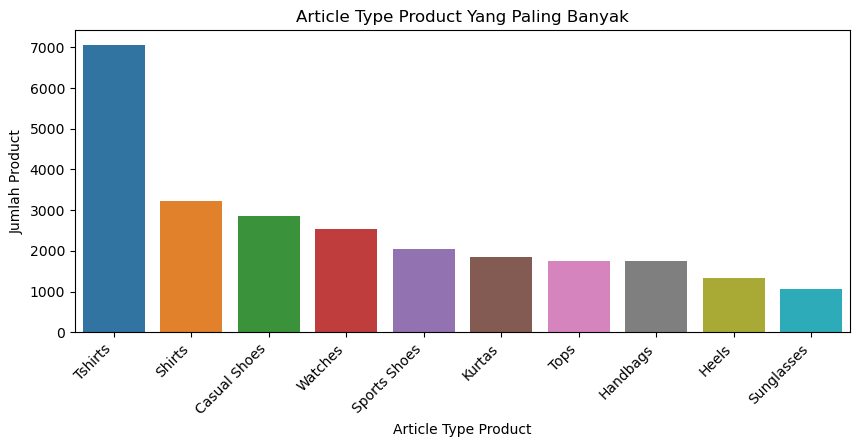

In [111]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=article_type.index, y=article_type.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Article Type Product')
plt.ylabel("Jumlah Product")
plt.title("Article Type Product Yang Paling Banyak")
plt.show()

### Tahun Kapan Product Dibuat?

In [112]:
year_product = df_product.groupby("year")["id"].count()
year_product

year
2007.0        2
2008.0        7
2009.0       20
2010.0      846
2011.0    13672
2012.0    16288
2013.0     1212
2014.0      236
2015.0     2780
2016.0     6006
2017.0     2916
2018.0      405
2019.0       33
Name: id, dtype: int64

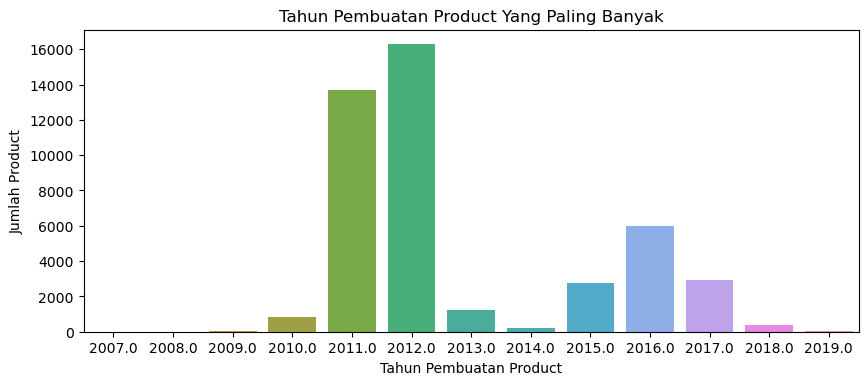

In [113]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=year_product.index, y=year_product.values)
plt.xlabel('Tahun Pembuatan Product')
plt.ylabel("Jumlah Product")
plt.title("Tahun Pembuatan Product Yang Paling Banyak")
plt.show()

### Bagaimana Distribusi Jumlah Product Berdasarkan Season?

In [114]:
season_product = df_product.groupby("season")["id"].count()
season_product

season
Fall      11431
Spring     2983
Summer    21472
Winter     8517
Name: id, dtype: int64

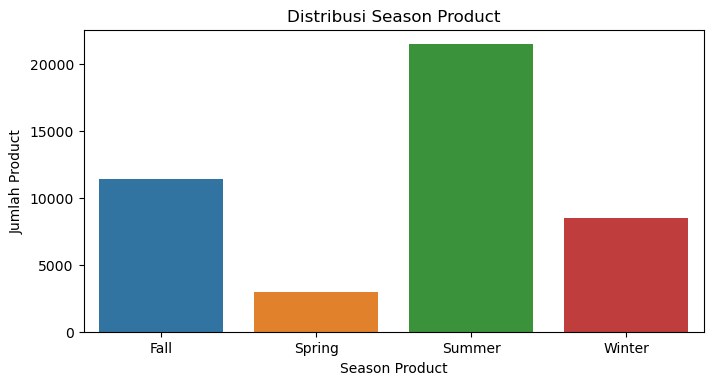

In [115]:
plt.figure(figsize=(8,4), dpi=100)
sns.barplot(x=season_product.index, y=season_product.values)
plt.xlabel('Season Product')
plt.ylabel("Jumlah Product")
plt.title("Distribusi Season Product")
plt.show()

### Bagaimana Distribusi Jumlah Product Berdasarkan Kegunaannya?

In [116]:
usage_product = df_product.groupby("usage")["id"].count()
usage_product

usage
Casual          34406
Ethnic           3208
Formal           2345
Home                1
Party              29
Smart Casual       67
Sports           4025
Travel             26
Name: id, dtype: int64

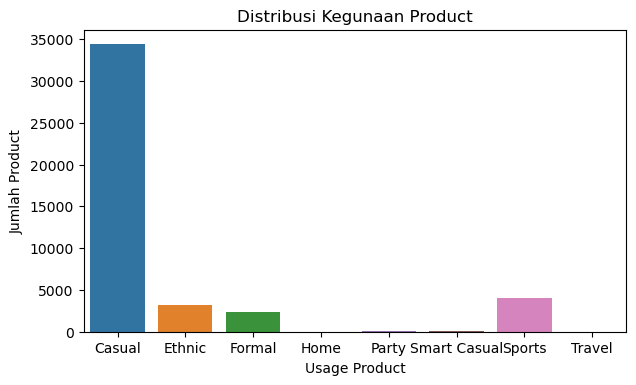

In [117]:
plt.figure(figsize=(7,4), dpi=100)
sns.barplot(x=usage_product.index, y=usage_product.values)
plt.xlabel('Usage Product')
plt.ylabel("Jumlah Product")
plt.title("Distribusi Kegunaan Product")
plt.show()

### Apa Product Terfavorit?

In [118]:
fav_product = df_product.groupby("productDisplayName")["id"].count()
fav_product = fav_product.sort_values(ascending=False).head(10)
fav_product

productDisplayName
Lucera Women Silver Earrings              82
Lucera Women Silver Pendant               56
Lucera Women Silver Ring                  50
Catwalk Women Black Heels                 48
Q&Q Men Black Dial Watch                  42
Fastrack Men Black Dial Watch             41
Maxima Men White Dial Watch               38
Fabindia Women Anusuya Silver Earrings    37
FNF Multi Coloured Printed Sari           32
Miami Blues Women Sunglasses              31
Name: id, dtype: int64

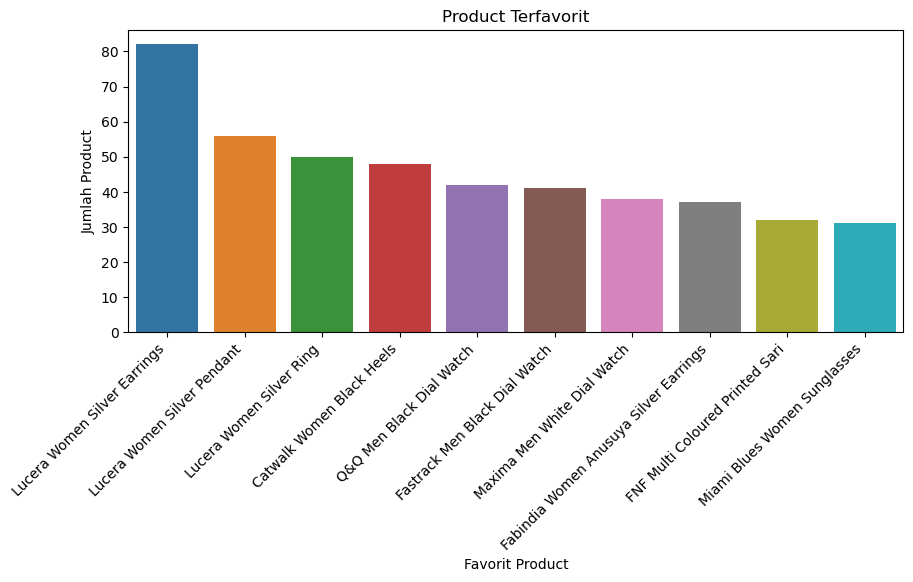

In [119]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=fav_product.index, y=fav_product.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Favorit Product')
plt.ylabel("Jumlah Product")
plt.title("Product Terfavorit")
plt.show()

### Bagaimana distribusi status pembayaran?

In [120]:
df_trans.payment_status.value_counts()

Success    815964
Failed      36620
Name: payment_status, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


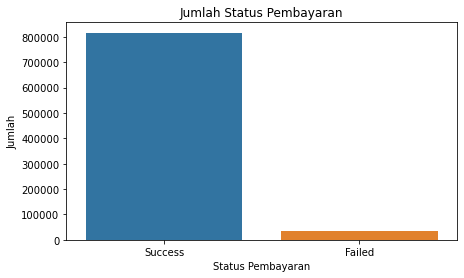

In [121]:
plt.figure(figsize=(7,4))
sns.countplot('payment_status', data=df_trans)
plt.title('Jumlah Status Pembayaran')
plt.ylabel('Jumlah')
plt.xlabel('Status Pembayaran')
plt.show()

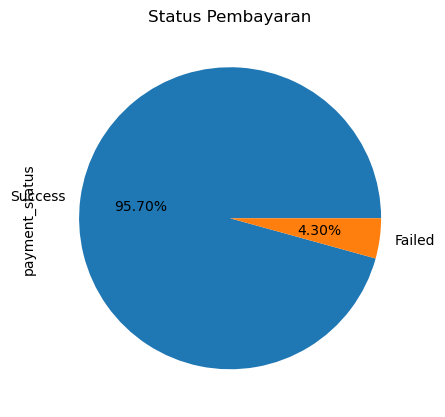

In [122]:
plt.figure(figsize=(5,5), dpi= 100)
df_trans.payment_status.value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Status Pembayaran')
plt.show()

### Apa jenis pembayaran yang paling banyak dilakukan oleh customer?

In [123]:
best_method = df_trans.groupby(['payment_method'])['customer_id'].count().sort_values(ascending=False)
best_method

payment_method
Credit Card    299586
Gopay          171334
OVO            169066
Debit Card     137269
LinkAja         75329
Name: customer_id, dtype: int64

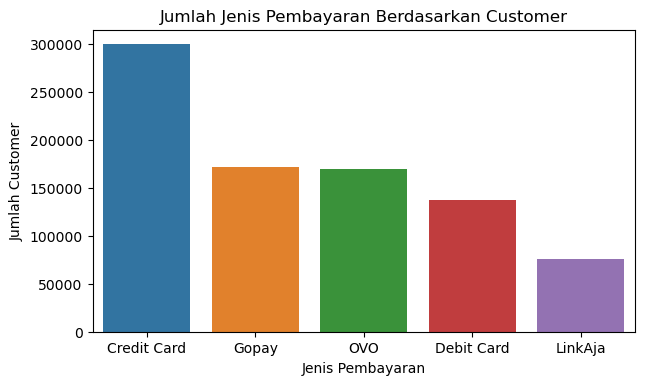

In [124]:
plt.figure(figsize=(7,4), dpi=100)
sns.barplot(x=best_method.index, y=best_method.values)
plt.title('Jumlah Jenis Pembayaran Berdasarkan Customer')
plt.ylabel('Jumlah Customer')
plt.xlabel('Jenis Pembayaran')
plt.show()

### Apa metode pembayaran yang paling banyak menghasilkan revenue?

In [125]:
total_rev_method = df_trans.groupby(['payment_method'])['total_amount'].sum().sort_values(ascending=False)
total_rev_method

payment_method
Credit Card    164571866929
Gopay           93837512187
OVO             92913944350
Debit Card      75760589561
LinkAja         41766109142
Name: total_amount, dtype: int64

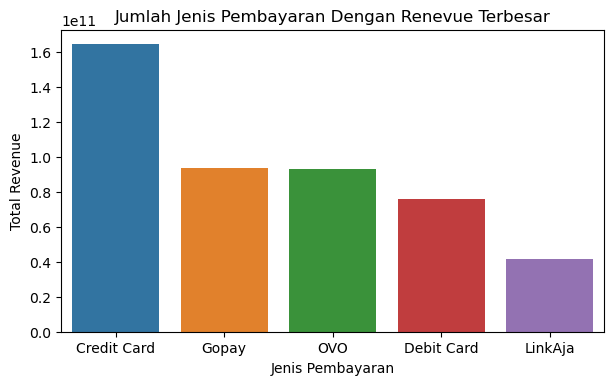

In [126]:
plt.figure(figsize=(7,4), dpi=100)
sns.barplot(x=total_rev_method.index, y=total_rev_method.values)
plt.title('Jumlah Jenis Pembayaran Dengan Renevue Terbesar')
plt.ylabel('Total Revenue')
plt.xlabel('Jenis Pembayaran')
plt.show()

### Bagaimana distribusi status pembayaran berdasarkan metode pembayaran?

In [127]:
df_trans.groupby(['payment_method','payment_status'])["customer_id"].count()

payment_method  payment_status
Credit Card     Failed             12894
                Success           286692
Debit Card      Failed              5958
                Success           131311
Gopay           Failed              7387
                Success           163947
LinkAja         Failed              3323
                Success            72006
OVO             Failed              7058
                Success           162008
Name: customer_id, dtype: int64

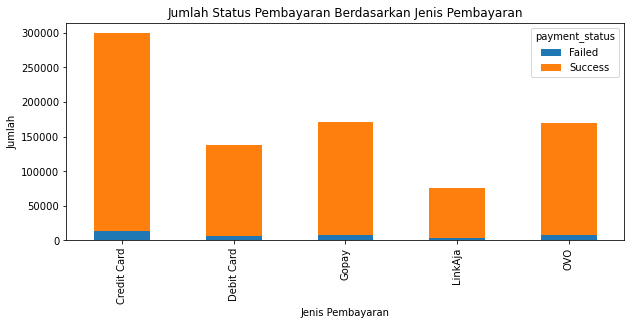

In [128]:
df_trans.groupby(['payment_method','payment_status']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,4))
plt.title('Jumlah Status Pembayaran Berdasarkan Jenis Pembayaran')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Pembayaran')
plt.show()

### Bagaimana tren jumlah order?

In [129]:
order_dist = df_trans.groupby(df_trans["created_at"].dt.date)[["customer_id"]].count()
order_dist.sort_values("created_at", ascending=False)

,customer_id
created_at,
2022-08-01,412
2022-07-31,993
2022-07-30,541
2022-07-29,492
2022-07-28,692
...,...
2016-07-05,8
2016-07-04,13
2016-07-03,7


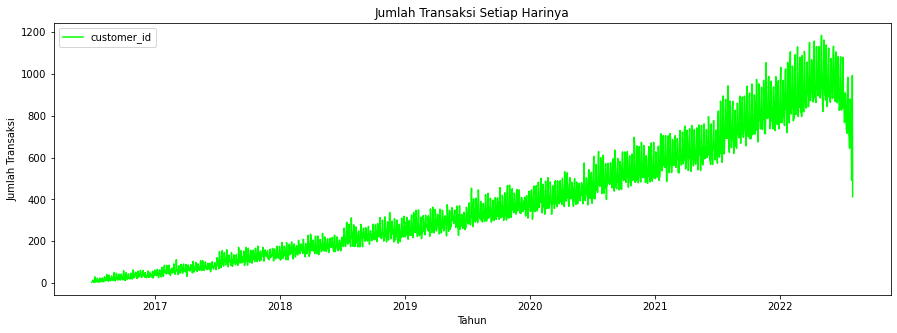

In [130]:
#nyari distribusi belanja
order_dist.plot(kind="line", color = "lime", figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Transaksi")
plt.title("Jumlah Transaksi Setiap Harinya")
plt.show()

### Apa promo code yang paling banyak digunakan?

In [131]:
most_promo_code = df_trans.groupby(['promo_code'])['customer_id'].count().sort_values(ascending=False)
most_promo_code

promo_code
NOPROMO          526048
AZ2022            89227
BUYMORE           66835
WEEKENDSERU       61941
XX2022            44744
LIBURDONG         20965
WEEKENDMANTAP     20448
SC2022            11271
STARTUP           11105
Name: customer_id, dtype: int64

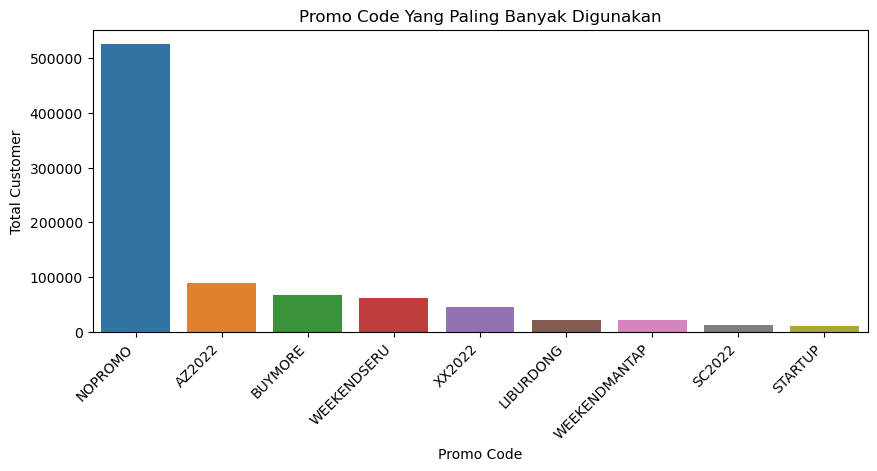

In [132]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=most_promo_code.index, y=most_promo_code.values)
plt.xticks(rotation=45, ha='right')
plt.title('Promo Code Yang Paling Banyak Digunakan')
plt.ylabel('Total Customer')
plt.xlabel('Promo Code')
plt.show()

### Bagaimana distribusi shipment fee?

In [133]:
dist_shipment_fee = df_trans.shipment_fee.value_counts()
dist_shipment_fee

10000    461089
0        220605
5000      58896
15000     56205
25000     28117
50000     27672
Name: shipment_fee, dtype: int64

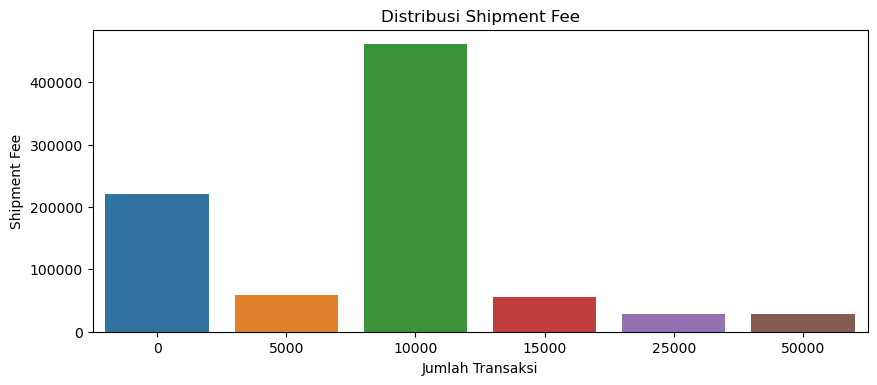

In [134]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=dist_shipment_fee.index, y=dist_shipment_fee.values)
plt.title('Distribusi Shipment Fee')
plt.ylabel('Shipment Fee')
plt.xlabel('Jumlah Transaksi')
plt.show()

### Bagaimana distribusi traffic user?

In [135]:
traffic_src = df_click.groupby('traffic_source')[['event_id']].count()
traffic_src

,event_id
traffic_source,
MOBILE,11548304
WEB,1285298


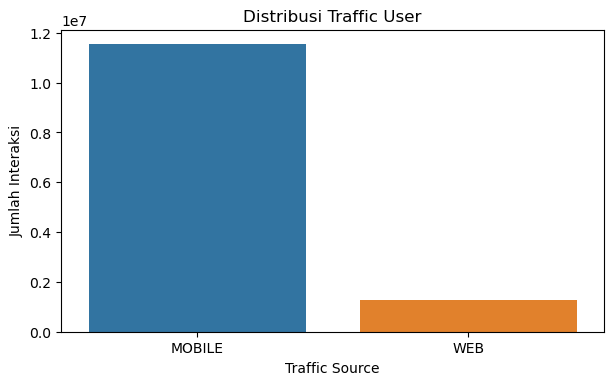

In [136]:
plt.figure(figsize=(7,4), dpi=100)
sns.barplot(x=traffic_src.index, y=traffic_src.event_id)
plt.title('Distribusi Traffic User')
plt.ylabel('Jumlah Interaksi')
plt.xlabel('Traffic Source')
plt.show()

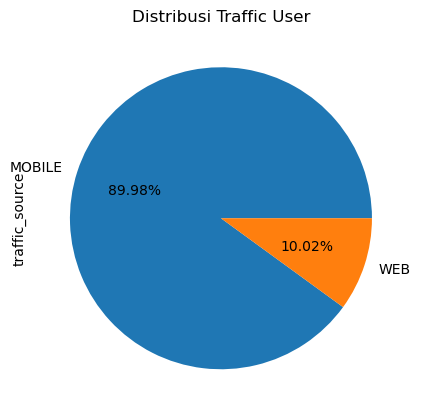

In [137]:
plt.figure(figsize=(5,5), dpi= 100)
df_click.traffic_source.value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Distribusi Traffic User')
plt.show()

### Aktivitas apa saja yang dilakukan customer?

In [138]:
#Mengecek aktivitas yang dilakukan customer saat mengakses aplikasi
customer_click = df_1.event_name.value_counts()
customer_click

CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: event_name, dtype: int64

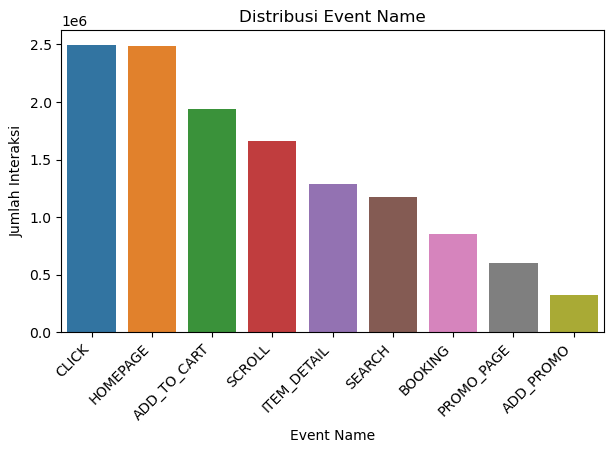

In [139]:
plt.figure(figsize=(7,4), dpi=100)
sns.barplot(x=customer_click.index, y=customer_click.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Event Name')
plt.ylabel('Jumlah Interaksi')
plt.xlabel('Event Name')
plt.show()

### Bagaimana tren aktivitas pada platform?

In [140]:
act_dist = df_click.groupby(df_click.event_time.dt.date)[["session_id"]].count()
act_dist.sort_values("event_time", ascending=False)

,session_id
event_time,
2022-08-01,16996
2022-07-31,14582
2022-07-30,8813
2022-07-29,8063
2022-07-28,10620
...,...
2016-07-05,137
2016-07-04,196
2016-07-03,99


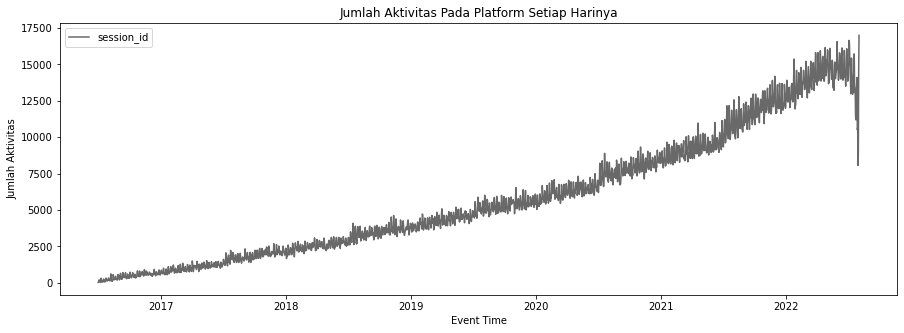

In [141]:
act_dist.plot(kind="line", color = "dimgray", figsize=(15,5))
plt.xlabel("Event Time")
plt.ylabel("Jumlah Aktivitas")
plt.title("Jumlah Aktivitas Pada Platform Setiap Harinya")
plt.show()

### Apa saja yang dicari oleh customer?

In [142]:
#mengecek pencarian yang dilakukan oleh customer
search = df_click.loc[df_click['event_name']=='SEARCH']

search["keyword"] = search.event_metadata.str[21 : -2]

C:\Users\User\AppData\Local\Temp\ipykernel_10132\1697180937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search["keyword"] = search.event_metadata.str[21 : -2]


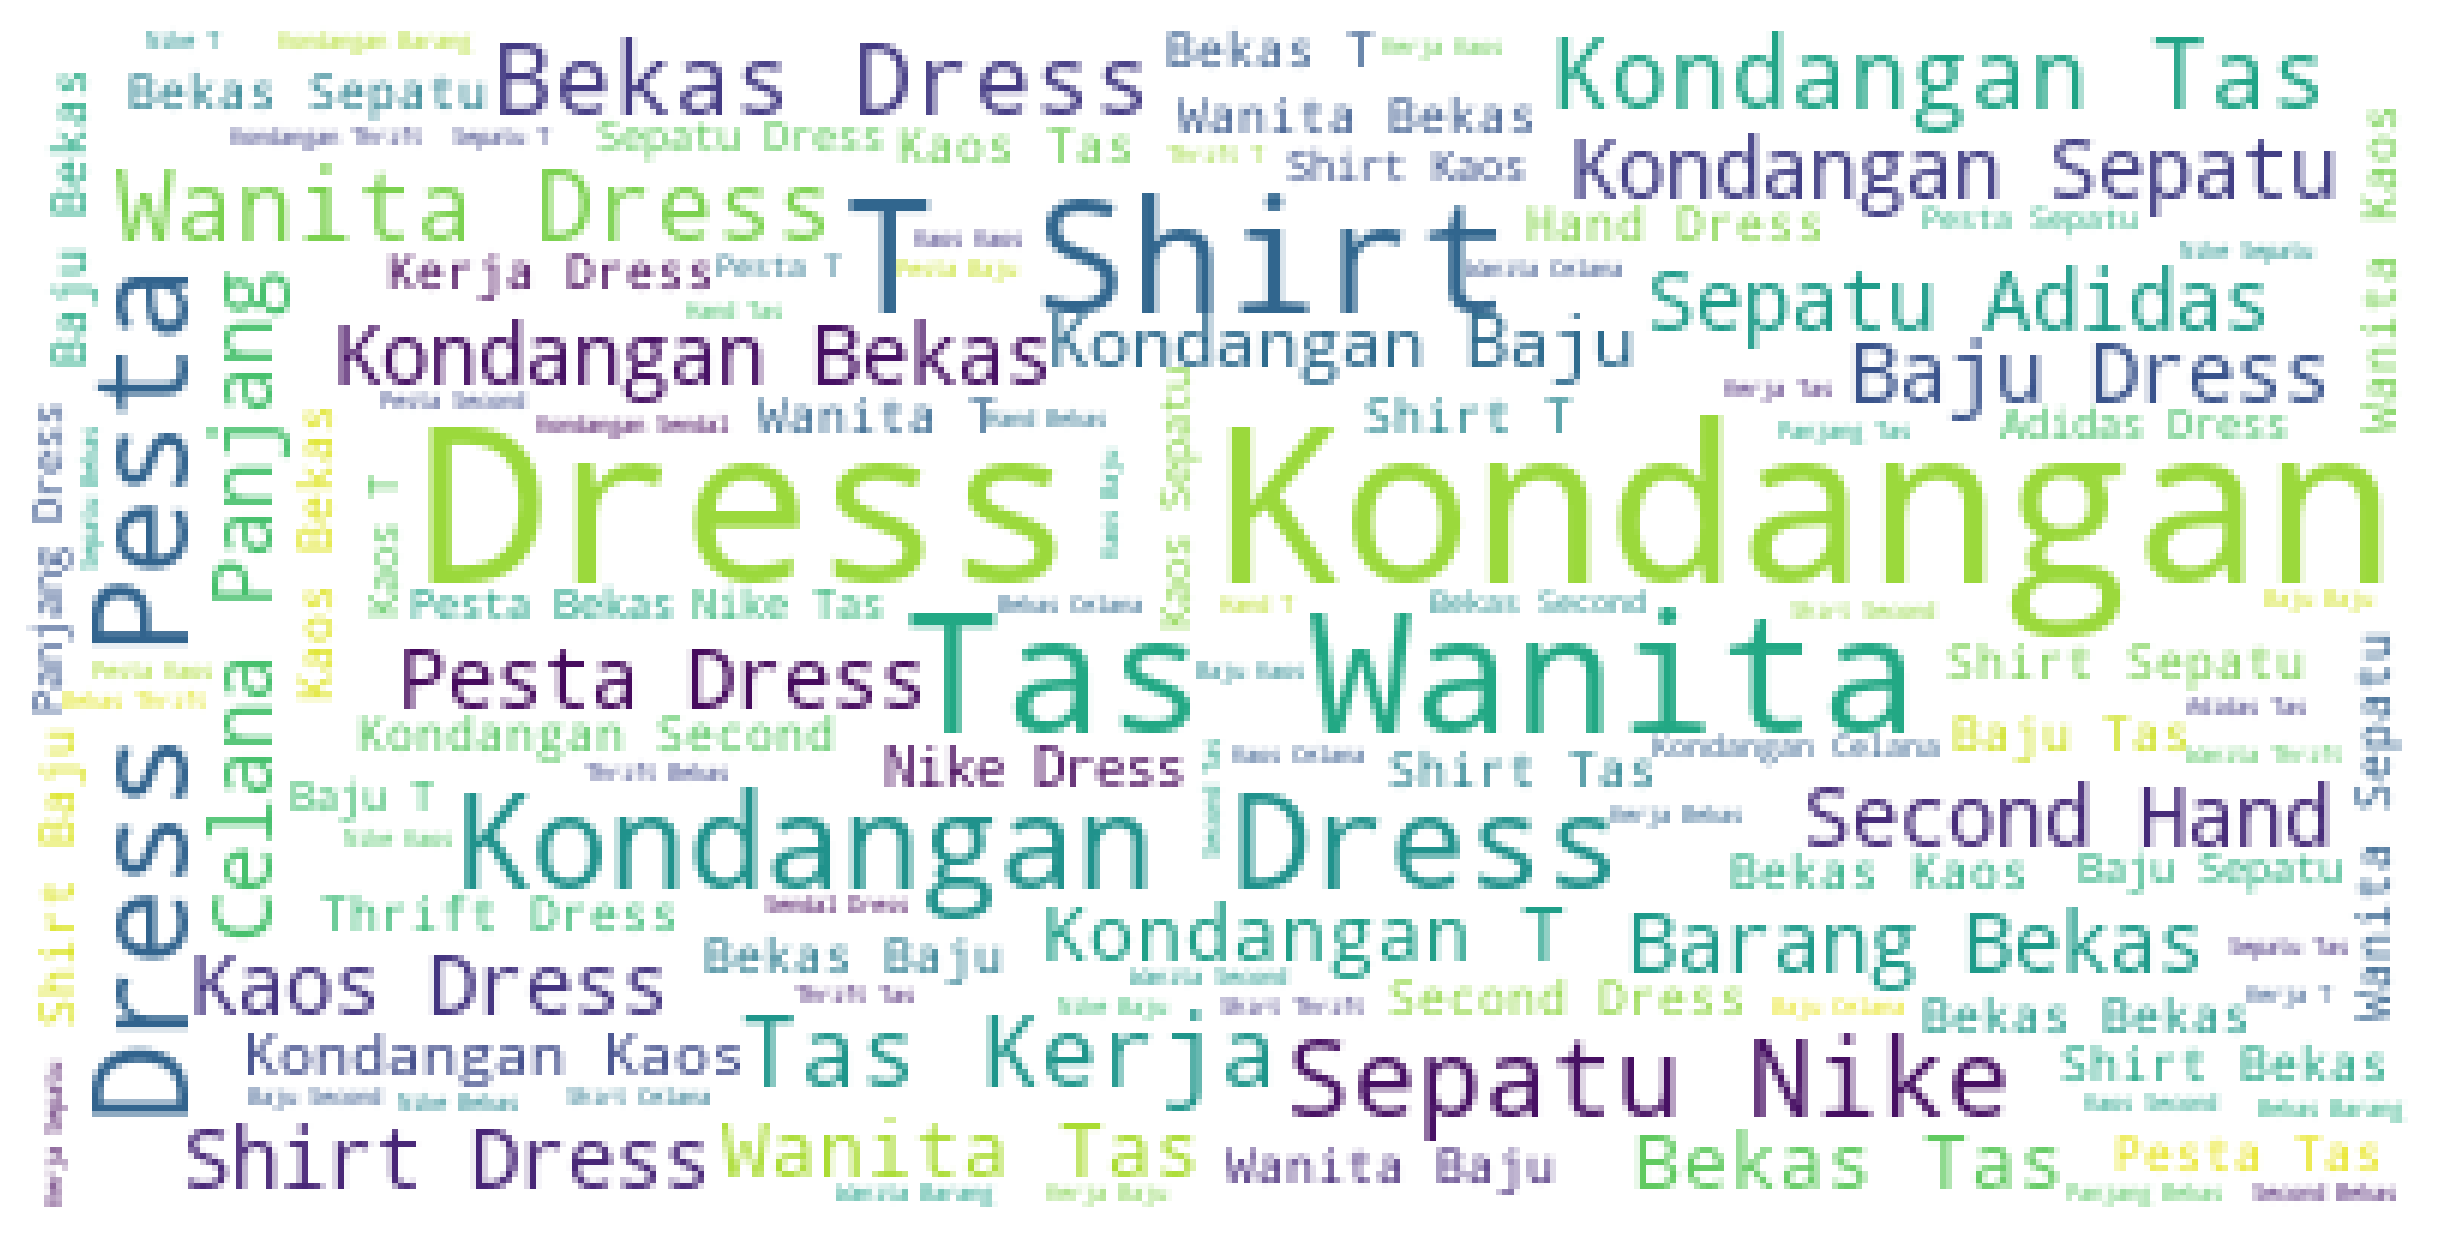

In [143]:
text = " ".join(review for review in search.keyword)
word_cloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)

plt.figure(figsize = (12, 8), facecolor = None, dpi=200) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [144]:
search["keyword"].value_counts()

Dress Kondangan    256194
Tas Wanita         128790
Bekas              112269
T-Shirt            100087
Baju                83873
Kaos                83759
Dress Pesta         76829
Sepatu Nike         51578
Tas Kerja           38677
Second Hand         28429
Second              28195
Thrift              28171
Sepatu              28029
Celana Panjang      28009
Barang Bekas        27818
Sepatu Adidas       25627
Sendal              12787
Celana              11739
T-shirt              7097
Jam                  7000
Topi                 4844
Baju Tidur           2268
Daster               1197
Name: keyword, dtype: int64

### Let's answer this question

In [145]:
#mengecek promo yang digunakan oleh customer
promo = df_1.loc[df_1['event_name']=='ADD_PROMO']
promo

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,created_at,customer_id,booking_id,product_metadata,...,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
20,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_PROMO,2019-09-09 14:22:05,28329764-aa29-4e7a-9d8e-eee88d00a640,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 7047}",2019-09-09 19:17:55,18770.0,022def29-0956-483a-b27c-ae69263351ef,product_id 6133 quantity 2 item_pri...,...,0,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31
46,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ADD_PROMO,2019-09-24 23:16:10,7a808081-2384-4a3a-ad00-9f10df4f07a7,WEB,"{'promo_code': 'BUYMORE', 'promo_amount': 4903}",2019-09-25 19:30:19,18770.0,32766f80-e889-4483-84f6-4da69e8fd8a8,product_id 25875 quantity 4 item_pr...,...,0,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31
53,98e66f53-f24f-4238-8c9c-34a0482e22d5,ADD_PROMO,2019-10-02 22:14:18,1d293181-b1cf-46e0-b5eb-682fe652131d,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 6307}",2019-10-03 19:34:39,18770.0,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,product_id 41867 quantity 1 item_pr...,...,0,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31
74,1553b735-081d-4dc5-8d5f-80c1bf442e0f,ADD_PROMO,2019-10-17 03:20:14,c86b2a91-0a21-404a-98e9-947d3060fdc2,MOBILE,"{'promo_code': 'WEEKENDSERU', 'promo_amount': ...",2019-10-19 20:06:22,18770.0,63f47c2b-bd2a-4f97-9d1b-d89d9477566e,product_id 21330 quantity 1 item_pr...,...,0,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31
169,a1027501-f085-479f-a719-1aeec041408c,ADD_PROMO,2019-11-20 10:28:12,cef2a298-e38b-4460-bc89-71f7a3039ff7,MOBILE,"{'promo_code': 'XX2022', 'promo_amount': 2569}",2019-11-20 20:15:42,18770.0,a3e75620-df33-44ee-b089-19a4da28bb48,product_id 16746 quantity 2 item_pr...,...,0,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12832905,cebfe9cd-0754-4151-9ba7-2372164686b7,ADD_PROMO,2020-04-05 17:24:17,a5ecd91b-ed11-4c8b-adf7-bab2720bc3c6,MOBILE,"{'promo_code': 'WEEKENDMANTAP', 'promo_amount'...",2020-04-05 17:30:03,43966.0,a2342099-f972-4863-b0ac-3c866863a457,product_id 39942 quantity 2 item_pr...,...,1,1991-07-10,Android,9765fa38-9f7c-4dcd-95b0-da8a4d5fc000,Android 2.3.7,0.282651,109.812087,Kalimantan Barat,Indonesia,2020-04-04
12832915,5e7c20e3-e1f0-42ae-9016-b3227169dea9,ADD_PROMO,2018-06-03 15:00:35,487307cd-222a-4131-bc6a-69effe9f6560,MOBILE,"{'promo_code': 'WEEKENDSERU', 'promo_amount': ...",2018-06-03 15:11:19,37120.0,7e05896c-b738-466b-8c63-9f1aeb0722b4,product_id 9940 quantity 1 item_pri...,...,0,1986-04-22,iOS,a4293aec-4fca-47d3-8fce-dd3422759d21,iPhone; CPU iPhone OS 14_2 like Mac OS X,-4.177285,105.536047,Lampung,Indonesia,2018-06-03
12832967,eef8cec1-9dc6-4756-a4bc-0832da4b6e69,ADD_PROMO,2021-07-25 15:23:48,7fd98dbb-ed1a-4a5e-998f-d09566a67de0,MOBILE,"{'promo_code': 'LIBURDONG', 'promo_amount': 3204}",2021-07-25 15:42:54,51835.0,334db380-b5c0-4b67-b946-a6be38507871,product_id 5085 quantity 1 item_pri...,...,1,2008-09-22,iOS,98512c2c-0270-4c37-874c-562558036a57,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-8.239113,114.583358,Bali,Indonesia,2021-07-25
12833104,137b5f97-a8d0-4898-ac99-12cbbfc52362,ADD_PROMO,2021-11-19 00:57:33,9abcf7c9-41e3-497e-974f-174a27161d2b,MOBILE,"{'promo_code': 'AZ2022', 'promo_amount': 5284}",2021-11-19 01:11:44,61582.0,d6130c15-b16a-4987-99a0-57cfe76ac1b9,product_id 38137 quantity 5 item_pr...,...,0,1998-09-15,Android,7a96c4c8-7b13-44ca-9efc-6309586c03ed,Android 7.0,3.696057,108.173055,Kepulauan Riau,Indonesia,2021-11-16


In [146]:
print(promo[promo.promo_code == "STARTUP"].created_at.min())
print(promo[promo.promo_code == "STARTUP"].created_at.max())

2016-07-13 06:48:02
2022-07-30 06:14:01


In [147]:
promo_c = df_trans.groupby(df_trans.created_at.dt.date)[["promo_amount"]].sum()
promo_c

,promo_amount
created_at,
2016-07-01,6053
2016-07-02,5855
2016-07-03,28007
2016-07-04,64422
2016-07-05,12447
...,...
2022-07-28,1030969
2022-07-29,888461
2022-07-30,714747


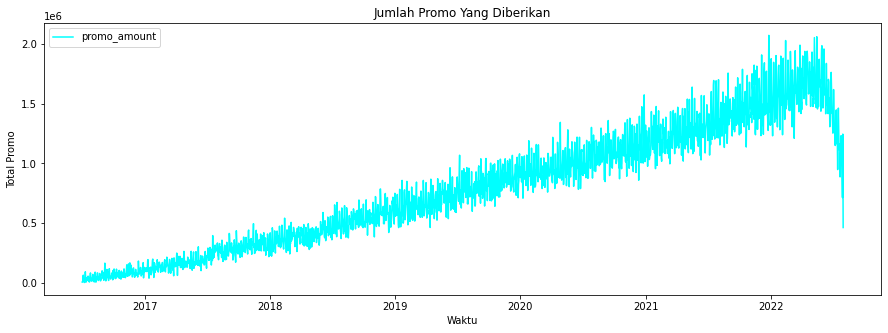

In [148]:
promo_c.plot(kind="line", color = "aqua", figsize=(15,5))
plt.xlabel("Waktu")
plt.ylabel("Total Promo")
plt.title("Jumlah Promo Yang Diberikan")
plt.show()

In [149]:

#mengecek promo yang digunakan oleh customer
dummy_df = df_trans.loc[df_trans['promo_code'] !='NOPROMO']

promo_a = dummy_df.groupby(dummy_df.created_at.dt.date)[["promo_code"]].count()
promo_a

,promo_code
created_at,
2016-07-01,1
2016-07-02,1
2016-07-03,5
2016-07-04,10
2016-07-05,3
...,...
2022-07-28,190
2022-07-29,156
2022-07-30,140


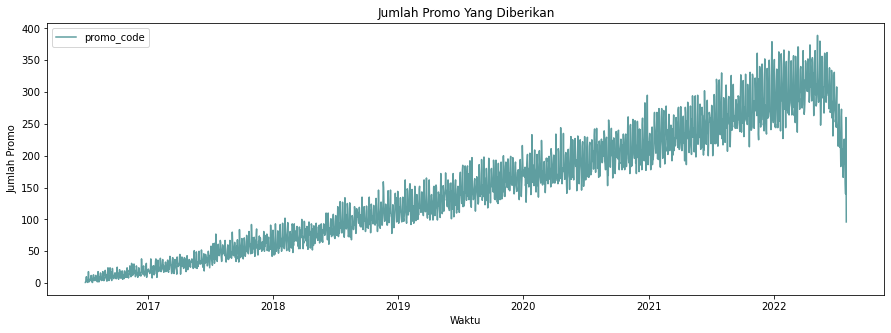

In [150]:
promo_a.plot(kind="line", color = "cadetblue", figsize=(15,5))
plt.xlabel("Waktu")
plt.ylabel("Jumlah Promo")
plt.title("Jumlah Promo Yang Diberikan")
plt.show()

In [151]:
promo_a.sort_values("created_at", ascending=False).head(20)

,promo_code
created_at,
2022-08-01,96
2022-07-31,260
2022-07-30,140
2022-07-29,156
2022-07-28,190
2022-07-27,187
2022-07-26,226
2022-07-25,209
2022-07-24,206


## Feature Engineering

In [152]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833602 entries, 0 to 12833601
Data columns (total 45 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   session_id              object        
 1   event_name              object        
 2   event_time              datetime64[ns]
 3   event_id                object        
 4   traffic_source          object        
 5   event_metadata          object        
 6   created_at              datetime64[ns]
 7   customer_id             float64       
 8   booking_id              object        
 9   product_metadata        object        
 10  payment_method          object        
 11  payment_status          object        
 12  promo_amount            float64       
 13  promo_code              object        
 14  shipment_fee            float64       
 15  shipment_date_limit     datetime64[ns]
 16  shipment_location_lat   float64       
 17  shipment_location_long  float64       
 18  

In [153]:
# membuat features tahun dilakukannya pembelian
df_1["purchase_year"] = df_1.created_at.dt.year

In [154]:
df_1['device_type'].fillna('unknown', inplace=True)

device_codes = {'Android': 0, 'iOS': 1, 'unknown': 2}
df_1['device_type'] = df_1.device_type.map(device_codes)
df_1.device_type = df_1.device_type.astype('category')

In [155]:
# Ubah kolom traffic_source menjadi 0 untuk web dan 1 untuk mobile
df_1['traffic_source'] = df_1['traffic_source'].apply(lambda x: 0 if x == 'web' else 1)

In [156]:
#membuat feature umur customer
df_1['age'] =  df_1.created_at.dt.year.max() - df_1.birthdate.dt.year

In [157]:
#membuat feature shipment fee customer
ongkir = df_1.groupby("customer_id")[["shipment_fee"]].sum()

#membuat feature jumlah promo yang telah customer gunakan
total_promo = df_1.groupby("customer_id")[["promo_amount"]].sum()

In [158]:
#membuat feature recency
recency = df_1.groupby(['customer_id'])['created_at'].max()
recency = pd.DataFrame(data = recency).reset_index()

recency['recent_days'] = recency['created_at'].max() - recency['created_at']
recency['recent_days'] = recency['recent_days'].dt.days

In [159]:
#membuat feature frequency
frequency = pd.DataFrame(df_1.groupby('customer_id')['booking_id'].count())

In [160]:
#membuat feature monetary
monetary = pd.DataFrame(df_1[['customer_id','total_amount']].groupby('customer_id')['total_amount'].sum())

In [161]:
df_rfm = pd.merge(recency, frequency, on='customer_id')
df_rfm = pd.merge(df_rfm, monetary, on='customer_id')

df_rfm = df_rfm.rename(columns = {'booking_id' : 'frequency'})
df_rfm = df_rfm.rename(columns = {'total_amount' : 'monetary'})
df_rfm.head()

,customer_id,created_at,recent_days,frequency,monetary
0,3.0,2022-06-26 22:41:52,35,682,299044279.0
1,8.0,2022-05-16 05:46:22,77,202,63812004.0
2,9.0,2022-05-28 15:44:32,64,59,33507505.0
3,11.0,2022-03-07 21:29:13,146,14,2765462.0
4,15.0,2022-01-05 13:07:58,207,57,23704990.0


In [162]:
#membuat feature RFM Score
df_rfm['R_rank'] = df_rfm['recent_days'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['monetary'].rank(ascending=True)

# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100

df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# referensi: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
df_rfm['RFM_Score'] = 0.15*df_rfm['R_rank_norm']+0.28 * df_rfm['F_rank_norm']+0.57*df_rfm['M_rank_norm']
df_rfm['RFM_Score'] *= 0.05
df_rfm = df_rfm.round(2)
df_rfm.head(7)

,customer_id,created_at,recent_days,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,3.0,2022-06-26 22:41:52,35,682,299044279.0,77.48,90.08,90.08,4.41
1,8.0,2022-05-16 05:46:22,77,202,63812004.0,58.47,71.44,71.44,3.47
2,9.0,2022-05-28 15:44:32,64,59,33507505.0,62.70,46.06,46.06,2.43
3,11.0,2022-03-07 21:29:13,146,14,2765462.0,43.79,17.41,17.41,1.07
4,15.0,2022-01-05 13:07:58,207,57,23704990.0,35.96,45.31,45.31,2.20
5,17.0,2020-09-27 20:52:19,672,15,2930515.0,14.15,18.59,18.59,0.90
6,18.0,2022-07-03 03:35:34,29,450,202419619.0,81.14,84.83,84.83,4.21


In [163]:
#membuat feature segmentasi customer berdasarkan RFM Score
df_rfm["Customer_segment"] = np.where(df_rfm['RFM_Score'] > 4.5, "Top Customers",
                                    (np.where(df_rfm['RFM_Score'] > 4, "High value Customer",
                                        (np.where(df_rfm['RFM_Score'] > 3, "Medium Value Customer",
                                                  np.where(df_rfm['RFM_Score'] > 1.6, 'Low Value Customers',
                                                           'Lost Customers'))))))

In [164]:
#membuat feature aktivitas customer pada platform
table = df_1.pivot_table(
    values="session_id", 
    index='customer_id', 
    columns='event_name', 
    aggfunc='count')
act_cust = table.reset_index()
act_cust

event_name,customer_id,ADD_PROMO,ADD_TO_CART,BOOKING,CLICK,HOMEPAGE,ITEM_DETAIL,PROMO_PAGE,SCROLL,SEARCH
0,3.0,27.0,156.0,51.0,118.0,109.0,56.0,42.0,72.0,51.0
1,8.0,1.0,14.0,7.0,25.0,93.0,32.0,5.0,16.0,9.0
2,9.0,NaN,16.0,6.0,11.0,8.0,5.0,3.0,6.0,4.0
3,11.0,1.0,4.0,1.0,1.0,3.0,2.0,2.0,NaN,NaN
4,15.0,4.0,21.0,5.0,9.0,9.0,3.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50699,99992.0,2.0,29.0,12.0,16.0,16.0,2.0,1.0,9.0,5.0
50700,99995.0,13.0,79.0,60.0,233.0,187.0,151.0,34.0,121.0,124.0
50701,99997.0,NaN,4.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN
50702,99998.0,6.0,40.0,8.0,31.0,169.0,35.0,16.0,33.0,16.0


In [165]:
#membuat feature pembelian pertama dan pembelian terakhir customer
pembelian_awal = df_1.groupby(['customer_id'])['created_at'].min()
pembelian_awal = pd.DataFrame(data = pembelian_awal).reset_index()
pembelian_awal = pembelian_awal.rename(columns = {'created_at' : 'initial_purchase_date'})

pembelian_akhir = df_1.groupby(['customer_id'])['created_at'].max()
pembelian_akhir = pd.DataFrame(data = pembelian_akhir).reset_index()
pembelian_akhir = pembelian_akhir.rename(columns = {'created_at' : 'last_purchase_date'})

In [166]:
new_df = pd.merge(pembelian_awal, pembelian_akhir, on='customer_id')
df_rfm = pd.merge(new_df, df_rfm, on='customer_id')

In [167]:
#membuat feature berapa bulan antara pembelian pertama dan pembelian terakhir
df_rfm["tenure"] = (df_rfm.last_purchase_date - df_rfm.initial_purchase_date).dt.days/30

#membuat feature total transaksi yang dilakukan customer setiap bulannya
df_rfm["monthly_spend"] = np.round(df_rfm.monetary / df_rfm.tenure, 2)
df_rfm["monthly_spend"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_rfm["monthly_spend"].fillna(df_rfm.monetary, inplace=True)

In [168]:
# membuat feature berapa hari antara pembelian pertama dan pembelian selanjutnya
df_rfm["freq_diff"] = df_rfm['recent_days'] / df_rfm['frequency']

In [169]:
df_rfm.Customer_segment.value_counts()

Lost Customers           16111
Low Value Customers      14559
Medium Value Customer    10267
High value Customer       5250
Top Customers             4517
Name: Customer_segment, dtype: int64

In [170]:
df_rfm.groupby("Customer_segment")["recent_days"].mean()

Customer_segment
High value Customer       29.701333
Lost Customers           704.303519
Low Value Customers      200.119376
Medium Value Customer     64.652771
Top Customers             18.693602
Name: recent_days, dtype: float64

In [171]:
#membuat churn label
# referensi: https://www.linkedin.com/pulse/customer-churn-analysis-oversimplified-wrong-ian-pollard/
churn = []
for status, recent_days in zip(df_rfm.Customer_segment, df_rfm.recent_days):
    if status == "Lost Customers":
        churn.append(1)
    elif status == "Low Value Customers":
        if recent_days > 200:
            churn.append(1)
        else:
            churn.append(0)
    elif status == "Medium Value Customer":
        if recent_days > 64:
            churn.append(1)
        else:
            churn.append(0)
    elif status == "High value Customer":
        if recent_days > 29:
            churn.append(1)
        else:
            churn.append(0)
    elif status == "Top Customers":
        if recent_days > 18:
            churn.append(1)
        else:
            churn.append(0)

In [172]:
pd_churn = pd.DataFrame(churn, columns = ['churn'])
df_rfm['churn'] = pd_churn
df_rfm['churn'].value_counts()

1    29943
0    20761
Name: churn, dtype: int64

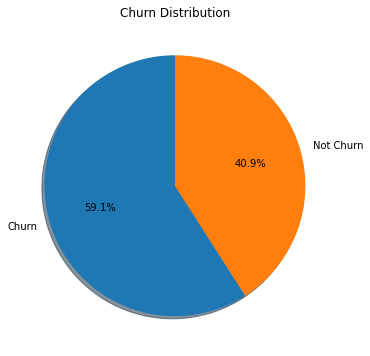

In [173]:
plt.figure(figsize=(10, 6))
plt.pie(df_rfm['churn'].value_counts(), labels=['Churn', 'Not Churn'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Churn Distribution')
plt.show()

## Merge data

In [193]:
df_rfm = pd.merge(df_rfm, ongkir, on='customer_id')
df_rfm = pd.merge(df_rfm, total_promo, on='customer_id')
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            50704 non-null  float64       
 1   initial_purchase_date  50704 non-null  datetime64[ns]
 2   last_purchase_date     50704 non-null  datetime64[ns]
 3   created_at             50704 non-null  datetime64[ns]
 4   recent_days            50704 non-null  int64         
 5   frequency              50704 non-null  int64         
 6   monetary               50704 non-null  float64       
 7   R_rank_norm            50704 non-null  float64       
 8   F_rank_norm            50704 non-null  float64       
 9   M_rank_norm            50704 non-null  float64       
 10  RFM_Score              50704 non-null  float64       
 11  Customer_segment       50704 non-null  object        
 12  tenure                 50704 non-null  float64       
 13  m

In [178]:
data = pd.merge(df_click, df_trans, on='session_id', how = 'inner')
data = pd.merge(data, df_customer, on='customer_id', how = 'inner')

In [180]:
data = data.sort_values('created_at').groupby('customer_id').tail(1)
data.reset_index(drop = True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              50704 non-null  object        
 1   event_name              50704 non-null  object        
 2   event_time              50704 non-null  datetime64[ns]
 3   event_id                50704 non-null  object        
 4   traffic_source          50704 non-null  object        
 5   event_metadata          21225 non-null  object        
 6   created_at              50704 non-null  datetime64[ns]
 7   customer_id             50704 non-null  int64         
 8   booking_id              50704 non-null  object        
 9   product_metadata        50704 non-null  object        
 10  payment_method          50704 non-null  object        
 11  payment_status          50704 non-null  object        
 12  promo_amount            50704 non-null  int64 

In [192]:
# df = pd.merge(data, df_rfm, on='customer_id', how="inner")
# df = pd.merge(df, act_cust, on='customer_id', how="inner")

dummy_data = pd.merge(data, df_rfm, on='customer_id', how="inner")
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            50704 non-null  float64       
 1   initial_purchase_date  50704 non-null  datetime64[ns]
 2   last_purchase_date     50704 non-null  datetime64[ns]
 3   created_at             50704 non-null  datetime64[ns]
 4   recent_days            50704 non-null  int64         
 5   frequency              50704 non-null  int64         
 6   monetary               50704 non-null  float64       
 7   R_rank_norm            50704 non-null  float64       
 8   F_rank_norm            50704 non-null  float64       
 9   M_rank_norm            50704 non-null  float64       
 10  RFM_Score              50704 non-null  float64       
 11  Customer_segment       50704 non-null  object        
 12  tenure                 50704 non-null  float64       
 13  m

In [183]:
df.duplicated().sum()

0

In [185]:
import plotly.express as px
import matplotlib

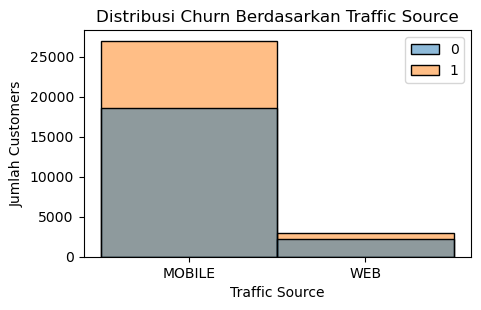

In [205]:
plt.figure(figsize=(5,3), dpi=100)
sns.histplot(df, x='traffic_source', hue=churn)
plt.xlabel("Traffic Source")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Traffic Source");

# sns.kdeplot(x='promo_amount', hue='churn', data=mergedata, fill=True, alpha=.5, linewidth=0, ax=ax_promo_amount, palette='viridis', shade=True)


In [219]:
traffic_churn = df.groupby(["traffic_source","churn"])["customer_id"].count()
traffic_churn

traffic_source  churn
MOBILE          0        18685
                1        26898
WEB             0         2076
                1         3045
Name: customer_id, dtype: int64

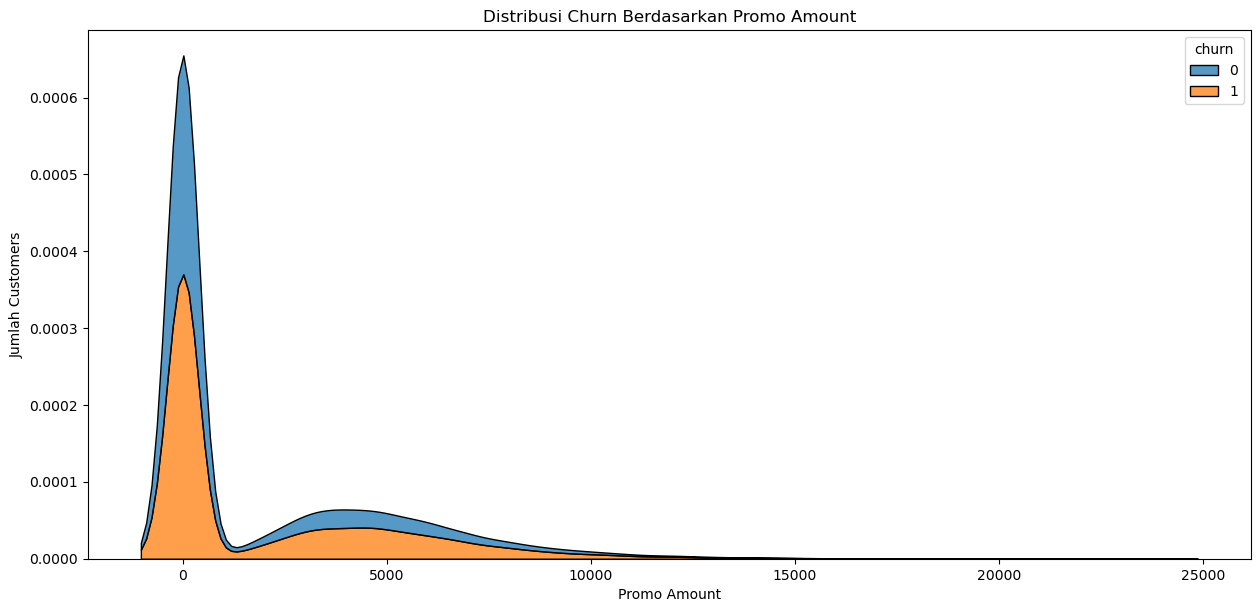

In [279]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='promo_amount_x', hue='churn', multiple="stack")
plt.xlabel("Promo Amount")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Promo Amount");

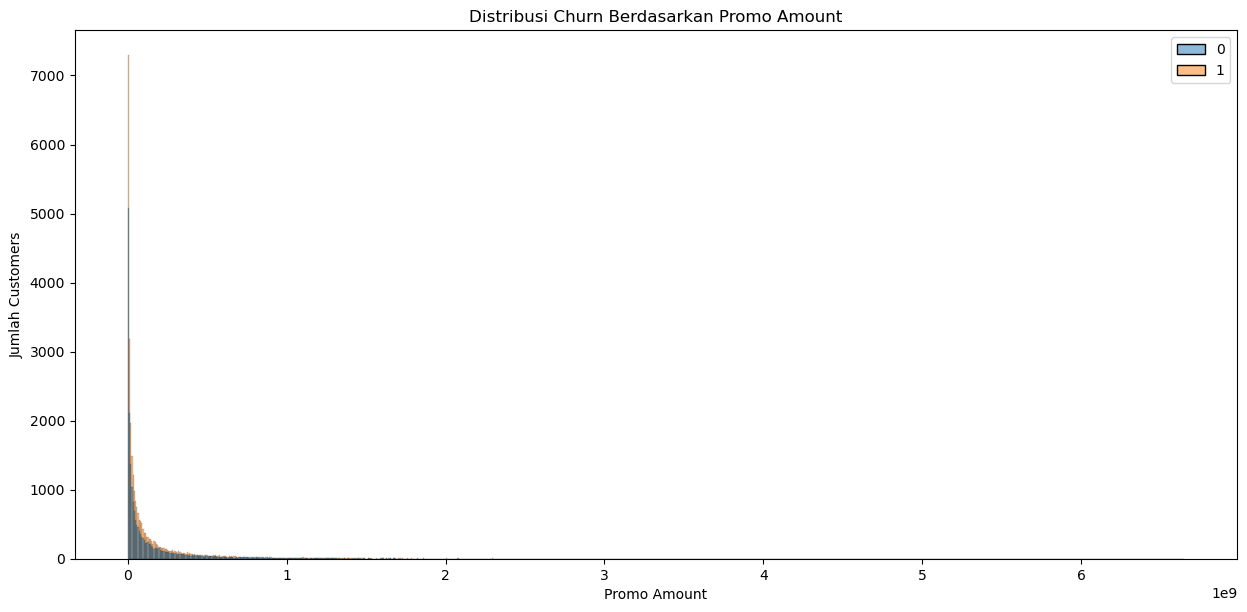

In [214]:
plt.figure(figsize=(15,7), dpi=100)
sns.histplot(df, x='monetary', hue=churn)
plt.xlabel("Promo Amount")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Promo Amount");

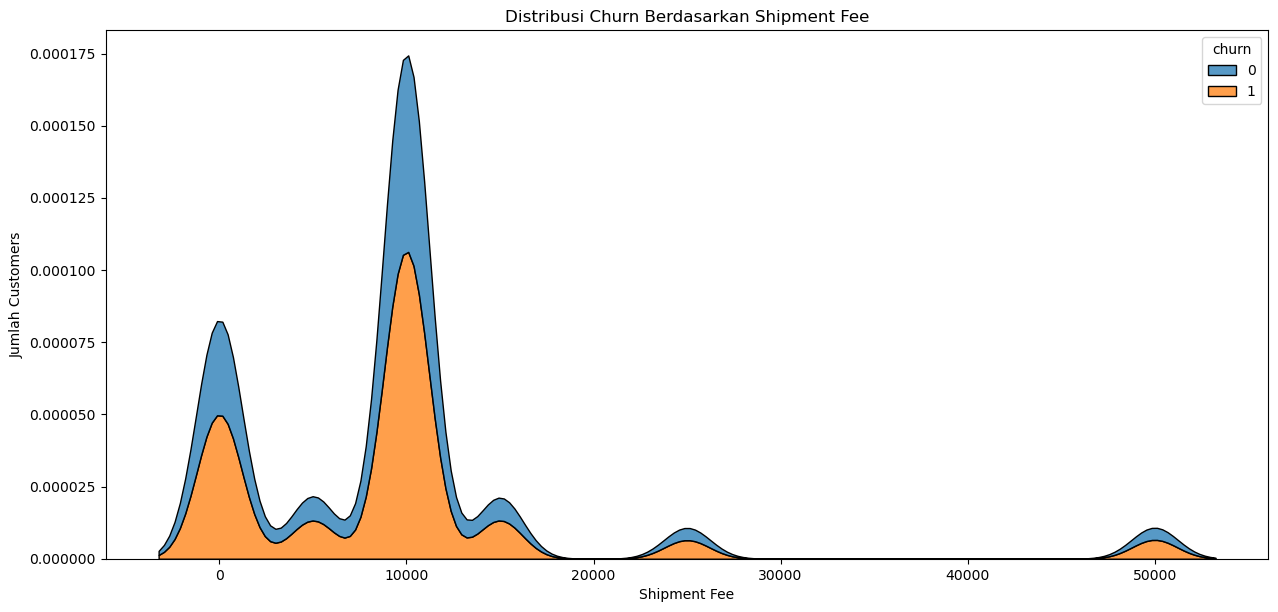

In [232]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='shipment_fee_x', hue='churn', multiple="stack")
plt.xlabel("Shipment Fee")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Shipment Fee");

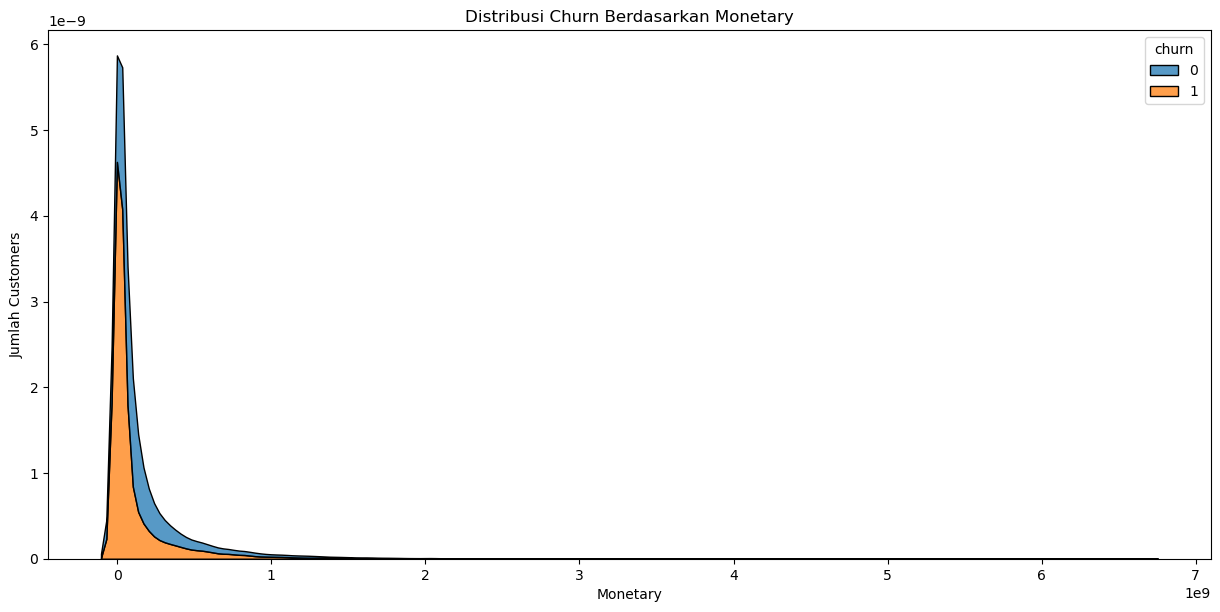

In [233]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='monetary', hue='churn', multiple="stack")
plt.xlabel("Monetary")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Monetary");

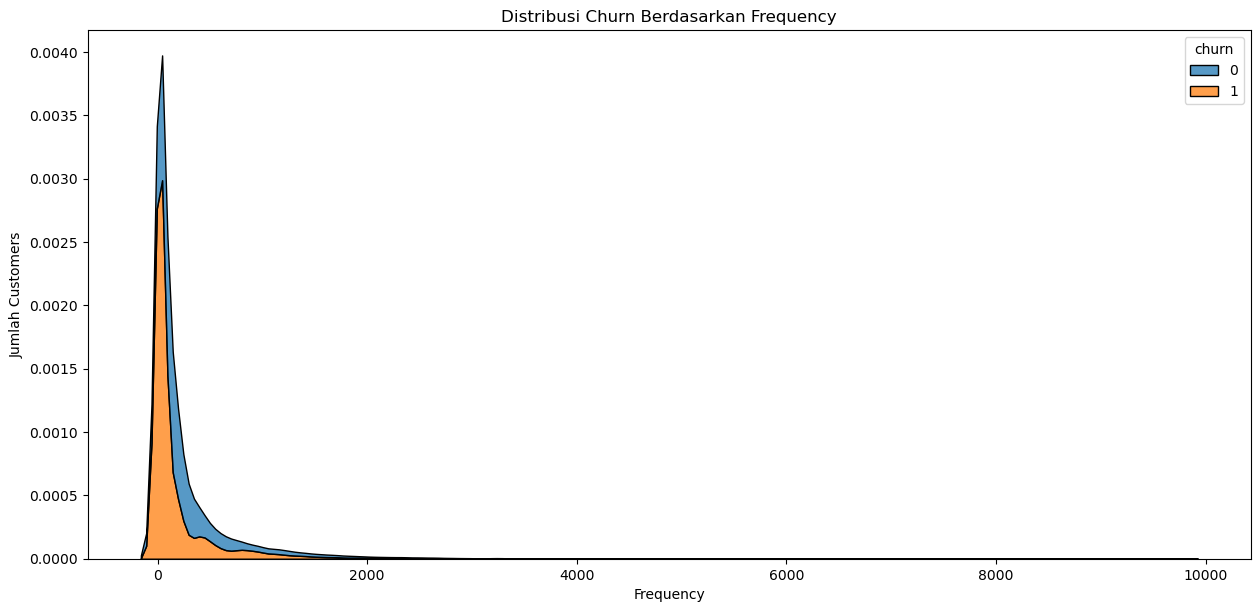

In [236]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='frequency', hue='churn', multiple="stack")
plt.xlabel("Frequency")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Frequency");

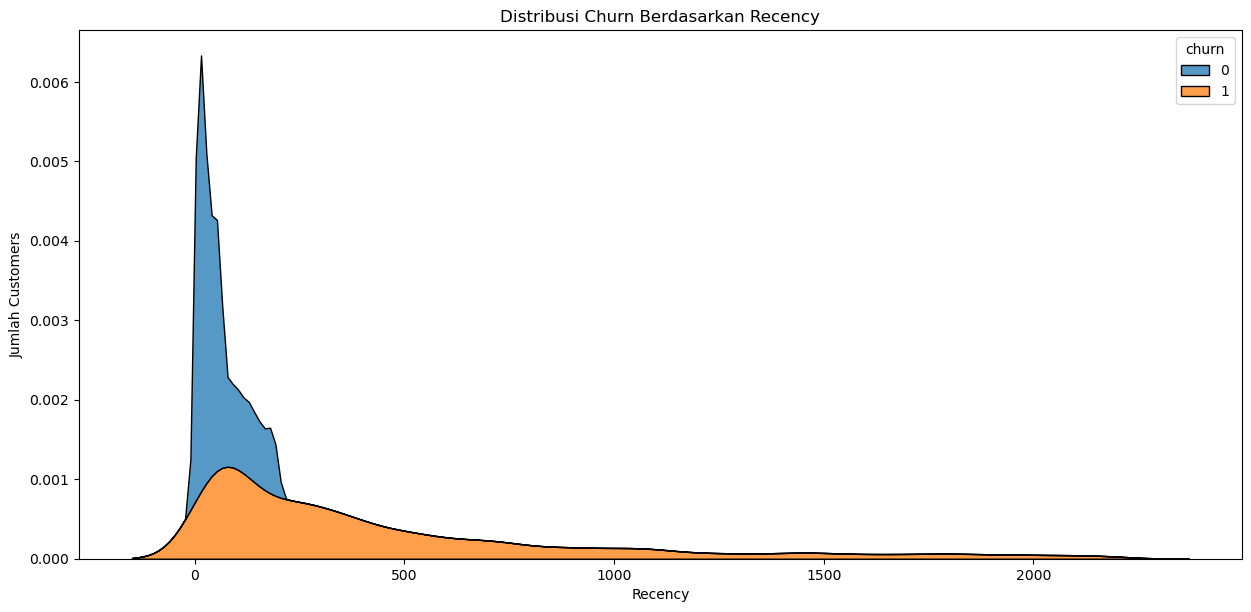

In [244]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='recent_days', hue='churn', multiple="stack")
plt.xlabel("Recency")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Recency");

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              50704 non-null  object        
 1   event_name              50704 non-null  object        
 2   event_time              50704 non-null  datetime64[ns]
 3   event_id                50704 non-null  object        
 4   traffic_source          50704 non-null  object        
 5   event_metadata          21225 non-null  object        
 6   created_at_x            50704 non-null  datetime64[ns]
 7   customer_id             50704 non-null  int64         
 8   booking_id              50704 non-null  object        
 9   product_metadata        50704 non-null  object        
 10  payment_method          50704 non-null  object        
 11  payment_status          50704 non-null  object        
 12  promo_amount_x          50704 non-null  int64 

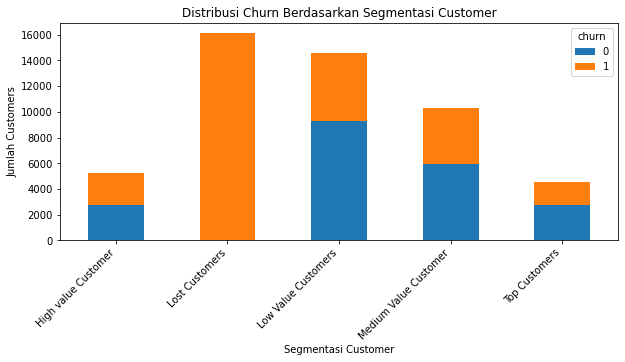

In [260]:
df.groupby(['Customer_segment','churn']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,4))
plt.xticks(rotation=45, ha="right")
plt.xlabel("Segmentasi Customer")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Segmentasi Customer");

In [253]:
segment_churn = df.groupby(["Customer_segment","churn"])["customer_id"].count()
segment_churn

Customer_segment       churn
High value Customer    0         2739
                       1         2511
Lost Customers         1        16111
Low Value Customers    0         9305
                       1         5254
Medium Value Customer  0         5961
                       1         4306
Top Customers          0         2756
                       1         1761
Name: customer_id, dtype: int64

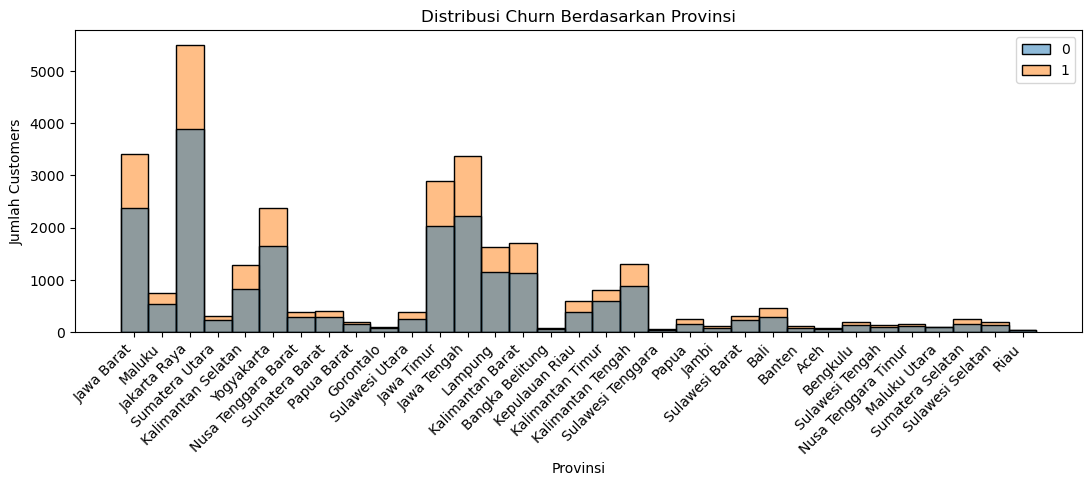

In [264]:
plt.figure(figsize=(13,4), dpi=100)
sns.histplot(df, x='home_location', hue=churn)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Provinsi");

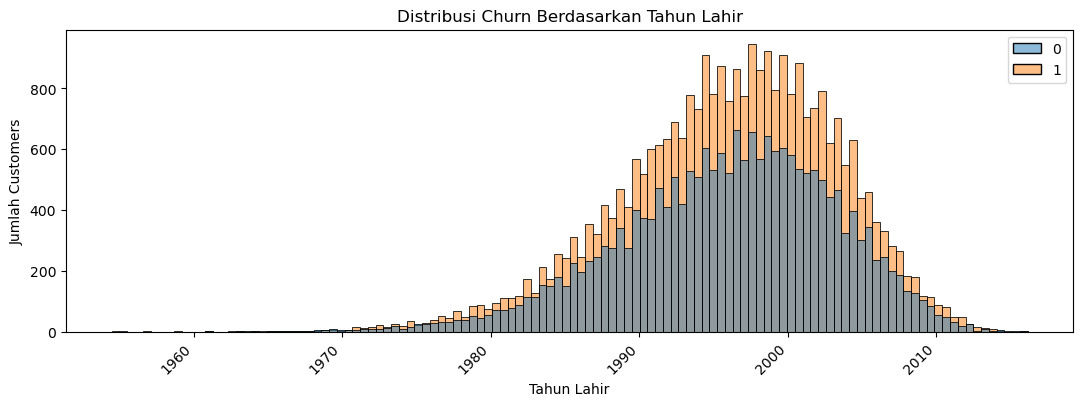

In [270]:
plt.figure(figsize=(13,4), dpi=100)
sns.histplot(df, x='birthdate', hue=churn)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Tahun Lahir")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Tahun Lahir");

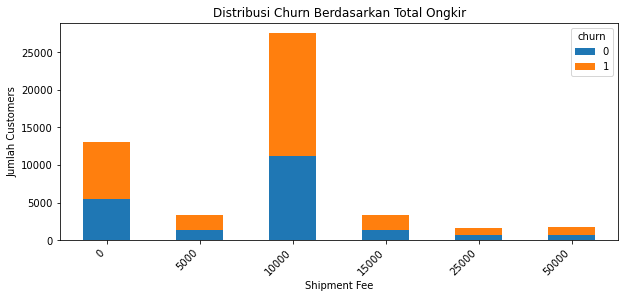

In [280]:
df.groupby(['shipment_fee_x','churn']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,4))
plt.xticks(rotation=45, ha="right")
plt.xlabel("Shipment Fee")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Total Ongkir");

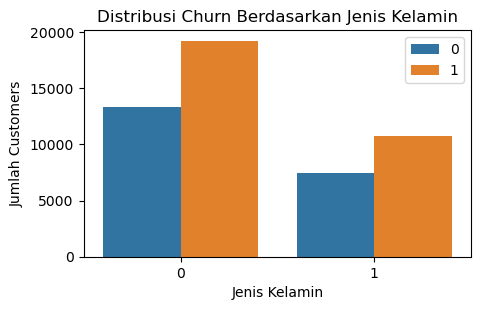

In [275]:
plt.figure(figsize=(5,3), dpi=100)
sns.countplot(data=df, x='gender', hue=churn)
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Jenis Kelamin");

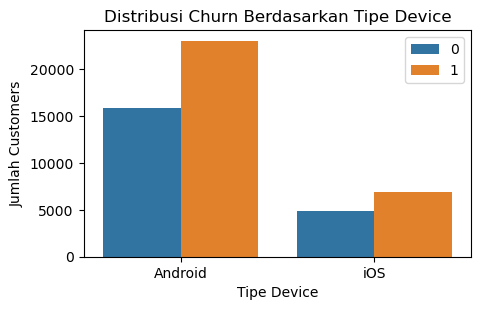

In [277]:
plt.figure(figsize=(5,3), dpi=100)
sns.countplot(data=df, x='device_type', hue=churn)
plt.xlabel("Tipe Device")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Tipe Device");